# 01. Logistic Regression and Classification Metrics | الانحدار اللوجستي ومقاييس التصنيف

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 1: All examples** - Data processing and regression
- ✅ **Unit 2: All examples** - Advanced regression and cross-validation
- ✅ **Understanding of classification**: Predicting categories (0/1) vs continuous values

**If you haven't completed these**, you might struggle with:
- Understanding the difference between regression and classification
- Knowing which metrics to use for classification
- Understanding probability predictions vs class predictions

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 3, Example 1** - it's your first classification model!

**Why this example FIRST in Unit 3?**
- **Before** you can use advanced classification, you need to understand basic classification
- **Before** you can evaluate classification models, you need to know classification metrics
- **Before** you can use complex classifiers, you need to master the simplest one

**Builds on**: 
- 📓 Unit 1, Example 4: Linear Regression (logistic regression is similar but for classification)
- 📓 Unit 2: All examples (evaluation concepts apply here too)

**Leads to**: 
- 📓 Example 2: Decision Trees (more complex classifier)
- 📓 Example 3: SVM (advanced classifier)
- 📓 All classification problems (logistic regression is the foundation!)

**Why this order?**
1. Logistic regression is the **simplest classification model** (easy to understand)
2. Logistic regression teaches **classification metrics** (different from regression!)
3. Logistic regression shows **probability predictions** (important for all classifiers)

---

## The Story: Predicting Categories Instead of Numbers | القصة: التنبؤ بالفئات بدلاً من الأرقام

Imagine you're a doctor. **Before** logistic regression, you can only predict continuous values (like blood pressure). **After** logistic regression, you can predict categories (like "sick" or "healthy") - much more useful for diagnosis!

Same with machine learning: **Before** logistic regression, we only predicted numbers (regression). **After** logistic regression, we can predict categories (classification) - opens up many new applications!

---

## Why Logistic Regression Matters | لماذا يهم الانحدار اللوجستي؟

Logistic regression is the foundation of classification:
- **Simplest Classifier**: Easy to understand and interpret
- **Probability Outputs**: Gives probabilities, not just predictions
- **Fast and Efficient**: Works quickly on large datasets
- **Interpretable**: You can see how features affect class probability
- **Real-World Use**: Used in medicine, finance, marketing, and more

## Learning Objectives | أهداف التعلم
1. Build logistic regression models for binary classification
2. Understand classification metrics (accuracy, precision, recall, F1)
3. Interpret confusion matrices
4. Create and interpret ROC curves
5. Visualize decision boundaries
6. Know when logistic regression is appropriate

---

## 📋 Notebook Structure | هيكل الدفتر

**This notebook follows a logical learning progression:**

1. **Step 1**: Load Data - Load binary classification dataset (30 features, 569 samples)
2. **Step 2**: Prepare Data - Extract features and target
3. **Step 3**: Split and Scale Data - Prepare for training
4. **Step 4**: Train Model - Build logistic regression model
5. **Sigmoid Visualization** - Understand how logistic regression converts linear to probabilities
6. **Step 5**: Evaluate Metrics - Calculate accuracy, precision, recall, F1
7. **Step 6**: Threshold Tuning - Explore different classification thresholds
8. **Step 7**: Handle Class Imbalance - Use class weights for imbalanced data
9. **Step 8**: Confusion Matrix - Visualize prediction errors
10. **Step 9**: ROC Curve - Evaluate model's ability to separate classes
11. **Step 10**: Decision Boundary - Visualize how model separates classes
12. **Step 11**: Decision Framework - When to use logistic regression
13. **Dead End Section**: Limitations - When logistic regression fails

**Why this order?**
- **Foundation First**: Load and prepare data before modeling
- **Build Then Evaluate**: Train model, then evaluate it
- **Basic to Advanced**: Start with basic metrics, then advanced techniques
- **Visualization Last**: See results after understanding concepts
- **Limitations at End**: Understand when NOT to use it

**This structure ensures you understand each concept before moving to the next!**

In [1]:
# Step 1: Import necessary libraries
# These libraries help us build and evaluate classification models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LogisticRegression  # The classification model!
from sklearn.preprocessing import StandardScaler  # For scaling features
from sklearn.metrics import (
    accuracy_score,      # Accuracy: % of correct predictions
    precision_score,    # Precision: Of predicted positives, how many are actually positive?
    recall_score,       # Recall: Of actual positives, how many did we catch?
    f1_score,           # F1: Harmonic mean of precision and recall
    confusion_matrix,   # Shows true/false positives/negatives
    classification_report,  # Comprehensive classification metrics
    roc_curve,         # ROC curve (True Positive Rate vs False Positive Rate)
    roc_auc_score      # AUC: Area under ROC curve (0-1, higher is better)
)

print("✅ Libraries imported successfully!")
print("\n📚 What each classification metric does:")
print("   - Accuracy: Overall correctness")
print("   - Precision: How reliable are positive predictions?")
print("   - Recall: How many positives did we catch?")
print("   - F1: Balance between precision and recall")
print("   - ROC/AUC: How well model separates classes")


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


✅ Libraries imported successfully!

📚 What each classification metric does:
   - Accuracy: Overall correctness
   - Precision: How reliable are positive predictions?
   - Recall: How many positives did we catch?
   - F1: Balance between precision and recall
   - ROC/AUC: How well model separates classes


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We've been doing regression (predicting numbers like prices). Now we need classification (predicting categories like "sick" or "healthy").

**AFTER**: We'll build logistic regression - a classification model that predicts probabilities and categories!

**Why this matters**: Many real-world problems are classification (spam/not spam, fraud/not fraud, sick/healthy). Logistic regression is the foundation!

---

## Step 1: Load Real-World Binary Classification Data | الخطوة 1: تحميل بيانات تصنيف ثنائية من العالم الحقيقي

**BEFORE**: We need to learn classification, but we need real binary classification data (two classes: 0 and 1).

**AFTER**: We'll load a well-known binary classification dataset with 30 features and 569 samples!

**Why this dataset?** This is a standard dataset from scikit-learn, perfect for learning binary classification because it has:
- **Binary Classification**: 2 classes (Class 0 and Class 1) - simplest classification problem
- **30 Numerical Features**: All features are continuous numbers (no encoding needed)
- **569 Samples**: Good size for learning (not too small, not too large)
- **Real-World Data**: Not synthetic - shows real-world data characteristics
- **Well-Studied**: Standard benchmark for classification algorithms

**For CS Students - Focus on Data Structure, Not Domain:**
- **Data Shape**: 569 rows (samples) × 30 columns (features) + 1 target column
- **Feature Type**: All numerical (continuous values like 10.5, 20.3, etc.)
- **Target Type**: Binary (0 or 1) - categorical classification
- **Task**: Predict class 0 or class 1 based on 30 numerical features
- **Class Distribution**: How many samples belong to each class (important for evaluation)

**What makes this dataset good for learning?**
- **Clear Structure**: Features (X) and target (y) are clearly separated
- **No Preprocessing Needed**: All features are already numerical
- **Binary Target**: Only 2 classes - easiest classification problem
- **Good for Visualization**: Can visualize decision boundaries with 2 features
- **Moderate Imbalance**: Roughly 60/40 split (good for learning class imbalance handling)


In [ ]:
# Load binary classification dataset from scikit-learn
# Binary classification = predicting one of two classes (0 or 1)
# This dataset has 30 numerical features and 569 samples

from sklearn.datasets import load_breast_cancer

print("\n📥 Loading binary classification dataset...")
print("تحميل مجموعة بيانات التصنيف الثنائي...")

cancer_data = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target

# Note: Target values are 0 or 1 (binary classification)
# We'll keep it as is for consistency with sklearn conventions

print(f"\n✅ Binary classification dataset loaded!")
print(f"   📊 Dataset structure: {len(df)} samples × {len(df.columns)-1} features")
print(f"   📈 Features: All numerical (continuous values)")
print(f"   🎯 Target: Binary classification (Class 0 or Class 1)")
print(f"\n🔍 For CS Students - Focus on Structure:")
print(f"   - Data shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"   - Feature type: All numerical (no encoding needed)")
print(f"   - Target type: Binary (0 or 1) - categorical")
print(f"   - Task: Predict class based on {len(df.columns)-1} features")
print(f"   - Perfect for learning binary classification!")



📥 Loading Breast Cancer Wisconsin dataset...
تحميل مجموعة بيانات سرطان الثدي من ويسكونسن...

✅ Real-world Breast Cancer dataset loaded!
   📊 This is REAL medical data from University of Wisconsin
   📈 Contains 569 samples with 30 features
   🎯 Target: Binary classification (0 = Malignant, 1 = Benign)

🔍 Notice:
   - This is REAL medical diagnosis data
   - Features are measurements from cell nuclei (radius, texture, etc.)
   - Perfect for learning binary classification!


## Step 2: Prepare Data for Modeling | الخطوة 2: إعداد البيانات للنمذجة

**BEFORE**: We have the dataset loaded, but we need to extract features (X) and target (y) for modeling.

**AFTER**: We'll extract features and target, then prepare them for training!

**Why this step?** Models need features (X) and target (y) as separate arrays. We'll create both 2D features (for visualization) and all features (for modeling)!

**For CS Students:**
- **Features (X)**: Input variables (30 numerical features)
- **Target (y)**: Output variable (binary: 0 or 1)
- **X_2d**: 2 features for 2D visualization (easier to see decision boundaries)
- **X_all**: All 30 features for actual modeling (better performance)


In [ ]:
# Prepare features (X) and target (y) from the loaded data
# Extract features and target from DataFrame
# We create two feature sets:
# - X_2d: 2 features for 2D visualization (easier to see decision boundaries)
# - X_all: All 30 features for actual modeling (better performance)

feature_1_name = 'mean radius'   # First feature for 2D visualization
feature_2_name = 'mean texture'  # Second feature for 2D visualization

X_2d = df[[feature_1_name, feature_2_name]].values  # 2 features for visualization
X_all = df[cancer_data.feature_names].values  # All 30 features for modeling
y = df['target'].values  # Target: Binary (0 or 1)

print(f"\n✅ Data prepared for modeling:")
print(f"   X_2d (for visualization): {X_2d.shape[1]} features")
print(f"   X_all (for modeling): {X_all.shape[1]} features")
print(f"   Target (y): {len(y)} samples")
print(f"   Features: {', '.join(cancer_data.feature_names[:4])}... and more")


✅ Data prepared for modeling:
   X_2d (for visualization): 2 features
   X_all (for modeling): 30 features
   Target (y): 569 samples
   Features: mean radius, mean texture, mean perimeter, mean area... and more


In [ ]:
# Data summary and exploration
# Show what we've prepared for modeling
print(f"\n📊 Data Summary:")
print(f"   Shape: {df.shape} (rows × columns)")
print(f"   Features: {len(cancer_data.feature_names)} numerical features")
print(f"   Target: Binary classification (Class 0 or Class 1)")
print(f"\n📄 First 5 rows (showing first 5 features):")
print(df.iloc[:, :6].head())  # Show first 5 features + target
print(f"\n📊 Class Distribution:")
print(df['target'].value_counts())
print(f"   - Class 0: {(df['target']==0).sum()} samples ({(df['target']==0).sum()/len(df):.1%})")
print(f"   - Class 1: {(df['target']==1).sum()} samples ({(df['target']==1).sum()/len(df):.1%})")
print("\n🔍 For CS Students - Key Observations:")
print("   - All features are numerical (continuous values)")
print("   - Binary target: 2 classes (0 and 1)")
print("   - Moderate class imbalance: ~63% Class 1, ~37% Class 0")
print("   - Perfect dataset for learning binary classification!")


📊 Real Data Summary:
   Shape: (569, 31)
   Features: 30 cell measurements
   Target: Binary (0 = Malignant, 1 = Benign)

📄 First 5 rows (showing first 5 features):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  
0           0.27760  
1           0.07864  
2           0.15990  
3           0.28390  
4           0.13280  

📊 Target distribution:
target
1    357
0    212
Name: count, dtype: int64
   - Class 0 (Malignant): 212 samples
   - Class 1 (Benign): 357 samples

🔍 Notice:
   - This is REAL medical diagnosis data from Wisconsin
   - Features are measurements

## Step 3: Split and Scale Data | الخطوة 3: تقسيم وتطبيع البيانات

**BEFORE**: We have features (X) and target (y), but we need to prepare them for training.

**AFTER**: We'll split data into train/test sets and scale features for optimal model performance!

**Why this step?**
- **Train/Test Split**: We need separate data for training (model learns) and testing (model evaluation)
- **Feature Scaling**: Logistic regression works better with scaled features (all features on same scale)
- **Stratify**: Maintains class distribution in both train and test sets (important for classification)

**This is a critical preprocessing step** - without it, the model won't train properly!


In [5]:
# Split data
# Use X_all (all 30 features) for training - better performance than just 2 features!
# X_2d was only for visualization - we use all features for the actual model
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42, stratify=y
)
# train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=42: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

In [6]:
# Scale features
scaler = StandardScaler()
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
print("\n" + "=" * 60)
print("1. Training Logistic Regression Model")
print("تدريب نموذج الانحدار اللوجستي")
print("=" * 60)

# Create and train logistic regression model
# max_iter=1000: Allow more iterations for convergence
# random_state=42: For reproducibility
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

print("   ✅ Model trained successfully!")
print("   Logistic regression learned to predict class probabilities")



1. Training Logistic Regression Model
تدريب نموذج الانحدار اللوجستي
   ✅ Model trained successfully!
   Logistic regression learned to predict class probabilities


## Understanding the Sigmoid Function | فهم دالة السيجمويد

**BEFORE**: We trained logistic regression, but what does it actually do?

**AFTER**: We'll visualize the sigmoid function to understand how logistic regression converts linear combinations into probabilities!

**What is the Sigmoid Function?**
- **Input**: Linear combination of features (can be any real number: -∞ to +∞)
- **Output**: Probability (always between 0 and 1)
- **Formula**: `σ(z) = 1 / (1 + e^(-z))` where `z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b`
- **Purpose**: Squashes any real number into the [0, 1] range (probabilities)

**Why is this important?**
- Logistic regression outputs probabilities, not just classes
- We can adjust the threshold (default 0.5) to control precision/recall
- Understanding sigmoid helps you understand how the model makes decisions

**For CS Students:**
- **Linear Regression**: Output = any real number (e.g., -5.2, 100.5, -0.3)
- **Logistic Regression**: Output = probability between 0 and 1 (e.g., 0.2, 0.7, 0.95)
- **Sigmoid**: The function that converts linear output → probability


In [ ]:
# Visualize the Sigmoid Function
# This shows how logistic regression converts linear combinations into probabilities

import numpy as np
import matplotlib.pyplot as plt

# Create range of z values (linear combination of features)
# z can be any real number (from very negative to very positive)
z = np.linspace(-10, 10, 1000)  # 1000 points from -10 to +10

# Calculate sigmoid function: σ(z) = 1 / (1 + e^(-z))
sigmoid = 1 / (1 + np.exp(-z))

# Create the visualization
plt.figure(figsize=(12, 6))

# Plot 1: Sigmoid curve
plt.subplot(1, 2, 1)
plt.plot(z, sigmoid, 'b-', linewidth=2, label='Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=1, label='Threshold = 0.5')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlabel('z (Linear Combination: w₁x₁ + w₂x₂ + ... + b)', fontsize=11)
plt.ylabel('Probability σ(z)', fontsize=11)
plt.title('Sigmoid Function: Linear → Probability', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.ylim(-0.1, 1.1)

# Add annotations
plt.annotate('Class 0\n(Probability < 0.5)', xy=(-5, 0.1), fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
plt.annotate('Class 1\n(Probability ≥ 0.5)', xy=(5, 0.9), fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Plot 2: Examples with actual predictions
plt.subplot(1, 2, 2)
# Get some example predictions from our trained model
example_features = X_test_scaled[:5]  # First 5 test samples
example_probs = logistic_model.predict_proba(example_features)[:, 1]  # Probability of Class 1
example_z = logistic_model.decision_function(example_features)  # Linear combination (z)

# Plot sigmoid curve
plt.plot(z, sigmoid, 'b-', linewidth=2, alpha=0.3, label='Sigmoid Function')
# Plot actual predictions from our model
plt.scatter(example_z, example_probs, color='red', s=100, zorder=5, 
           label='Actual Model Predictions', edgecolors='black', linewidth=1.5)
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=1, label='Threshold = 0.5')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlabel('z (Decision Function Output)', fontsize=11)
plt.ylabel('Probability of Class 1', fontsize=11)
plt.title('Real Predictions from Our Model', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print("   - Left side (z < 0): Low probability → Predict Class 0")
print("   - Right side (z > 0): High probability → Predict Class 1")
print("   - At z = 0: Probability = 0.5 (decision boundary)")
print("   - Sigmoid is S-shaped: Steepest change around z = 0")
print("   - As z → +∞: Probability → 1 (very confident Class 1)")
print("   - As z → -∞: Probability → 0 (very confident Class 0)")
print("\n🔍 Notice:")
print("   - Our model's predictions (red dots) follow the sigmoid curve!")
print("   - Each dot represents one test sample's prediction")
print("   - Dots above threshold (0.5) → Predict Class 1")
print("   - Dots below threshold (0.5) → Predict Class 0")


## Step 4: Train Logistic Regression Model | الخطوة 4: تدريب نموذج الانحدار اللوجستي

**BEFORE**: We have binary classification data, but no model to predict classes.

**AFTER**: We'll train logistic regression to predict probabilities and classes!

**Why logistic regression?**
- **Similar to linear regression**: But outputs probabilities (0-1) instead of continuous values
- **Sigmoid function**: Squashes output to [0,1] range (probabilities)
- **Interpretable**: Coefficients show how features affect class probability
- **Fast**: Works quickly even on large datasets

In [8]:
# Make class predictions (0 or 1)
# .predict() returns the predicted class (0 or 1)
# Uses threshold of 0.5: if probability > 0.5, predict class 1, else class 0
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

print(f"   ✅ Class predictions made!")
print(f"   Training predictions: {len(y_train_pred)}")
print(f"   Test predictions: {len(y_test_pred)}")

   ✅ Class predictions made!
   Training predictions: 455
   Test predictions: 114


In [9]:
# Get probability predictions (more informative than class predictions!)
# .predict_proba() returns probabilities for each class
# [:, 1] gets probability of class 1 (the positive class)
# Why probabilities? They tell us how confident the model is!
y_train_proba = logistic_model.predict_proba(X_train_scaled)[:, 1]
y_test_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

print("\n📊 Model Parameters:")
print(f"   Coefficients: {logistic_model.coef_[0]}")
print(f"   Intercept: {logistic_model.intercept_[0]:.4f}")
print(f"\n   Interpretation:")
print(f"   - Coefficients show how features affect class 1 probability")
print(f"   - Positive coefficient → increases probability of class 1")
print(f"   - Negative coefficient → decreases probability of class 1")


📊 Model Parameters:
   Coefficients: [-0.50506975 -0.55873422 -0.47140795 -0.53873734 -0.20771839  0.65362708
 -0.60657859 -0.70001318 -0.17298559  0.19360875 -1.08427851  0.25114768
 -0.5372148  -0.93489448 -0.15813328  0.64272374  0.17128749 -0.44708449
  0.35878449  0.43561586 -0.9451252  -1.24833214 -0.76142429 -0.95370642
 -0.75297843  0.04381431 -0.82886055 -0.94845784 -0.9352194  -0.17203651]
   Intercept: 0.3005

   Interpretation:
   - Coefficients show how features affect class 1 probability
   - Positive coefficient → increases probability of class 1
   - Negative coefficient → decreases probability of class 1


In [10]:
print("\n" + "=" * 60)
print("2. Evaluation Metrics")
print("مقاييس التقييم")
print("=" * 60)



2. Evaluation Metrics
مقاييس التقييم


## Step 5: Classification Evaluation Metrics | الخطوة 5: مقاييس تقييم التصنيف

**BEFORE**: We used MSE and R² for regression. Classification needs different metrics!

**AFTER**: We'll use classification metrics (accuracy, precision, recall, F1) that measure classification performance!

**Why different metrics?**
- **Regression**: Predicts numbers → use MSE, R²
- **Classification**: Predicts categories → use accuracy, precision, recall, F1
- **Each metric tells us something different**: Accuracy (overall), Precision (reliability), Recall (coverage), F1 (balance)

**⚠️ CRITICAL: When Are Metrics Calculated? | متى يتم حساب المقاييس؟**

**Metrics are calculated AFTER training, on TEST data:**
1. **Step 1**: Train model on training data (model learns patterns)
2. **Step 2**: Model makes predictions on test data (unseen data)
3. **Step 3**: Calculate metrics by comparing predictions to actual labels
4. **Step 4**: Use metrics to evaluate model performance

**Why AFTER training? | لماذا بعد التدريب؟**

### **The Purpose: Why We Calculate Metrics After Training**

**1. Metrics Measure Model Performance (Not Data Quality)**
- Metrics tell us: "How good is our trained model?"
- Before training: Model doesn't exist yet → nothing to measure!
- After training: Model learned patterns → we can test how well it learned

**2. We Need Predictions to Compare**
- Metrics = Comparison between predictions and actual values
- Before training: No predictions exist (model hasn't learned yet)
- After training: Model can make predictions → we can compare them to truth

**3. Test Data Shows Real-World Performance**
- Training metrics: Show if model memorized training data (may overfit)
- Test metrics: Show if model generalizes to NEW, unseen data (real performance)
- **Purpose**: We want to know how model performs on data it hasn't seen before!

**4. Metrics Guide Model Improvement**
- After training: We see metrics → identify problems → improve model
- Example: Low recall? → Model misses positives → adjust threshold or use class weights
- Before training: No metrics → no guidance → can't improve

**5. Metrics Validate the Model**
- After training: Metrics prove the model works (or doesn't)
- Before training: No validation possible → model might be useless

**Real-World Analogy:**
- 🎓 **Before training**: Like a student before studying (no knowledge to test)
- 📚 **Training**: Student learns from textbook (model learns from training data)
- 📝 **After training**: Student takes exam (model makes predictions on test data)
- ✅ **Metrics**: Exam score (how well student/model performs)

**What happens if you calculate metrics before training?**
- ❌ **Impossible!** You need a trained model to make predictions
- ❌ You can't calculate accuracy/precision/recall without predictions
- ❌ No model exists yet → nothing to evaluate
- ✅ **Always**: Train → Predict → Calculate Metrics

---

**🎯 The Purpose of Each Metric | الغرض من كل مقياس**

### **When to Use Which Metric?**

| Metric | Purpose | When to Use | Example |
|--------|---------|-------------|---------|
| **Accuracy** | Overall correctness | Balanced classes, equal cost of errors | General classification |
| **Precision** | Reliability of positive predictions | False positives are costly | Spam detection (don't block real emails) |
| **Recall** | Coverage of actual positives | False negatives are costly | Disease detection (catch all diseases) |
| **F1 Score** | Balance of precision and recall | Need both precision and recall | General use when classes are imbalanced |

### **Decision Tree: Which Metric to Focus On?**

```
Is missing a positive case (FN) worse than a false alarm (FP)?
├─ YES (FN worse) → Focus on RECALL
│   └─ Examples: Disease detection, fraud detection, security
│   └─ Goal: Catch ALL positive cases, even if some false alarms
│
├─ NO (FP worse) → Focus on PRECISION
│   └─ Examples: Spam detection, content moderation, recommendations
│   └─ Goal: Only predict positive when VERY sure
│
└─ BOTH matter equally → Use F1 SCORE
    └─ Examples: General classification, balanced problems
    └─ Goal: Balance between catching positives and being reliable
```

---

**Common Student Questions:**
- **Q: Why not just use accuracy?**
  - Answer: Accuracy can be misleading with imbalanced data!
  - Example: 99% negative, 1% positive → model predicts all negative = 99% accuracy (but useless!)
  - Solution: Use precision/recall to see performance on each class separately
- **Q: What's the difference between precision and recall?**
  - Answer: Precision = "Of what I predicted positive, how many were correct?"
  - Recall = "Of all actual positives, how many did I catch?"
  - Example: Medical test with high precision = few false alarms, high recall = catches most diseases
- **Q: Why F1 score? Why not just precision or recall?**
  - Answer: F1 balances precision and recall (harmonic mean)
  - Problem: High precision but low recall = misses many cases, high recall but low precision = many false alarms
  - Solution: F1 finds balance - good F1 = both precision and recall are decent
- **Q: When should I focus on precision vs recall?**
  - Answer: Depends on cost of errors:
  - High precision needed: Spam detection (few false positives = don't block real emails)
  - High recall needed: Disease detection (catch all diseases, even if some false alarms)
  - Balanced: Use F1 score
- **Q: Are metrics calculated before or after training?**
  - Answer: **AFTER training!** You must:
    1. Train the model first (model learns from data)
    2. Make predictions on test data
    3. Compare predictions to actual labels
    4. Calculate metrics from the comparison
  - You CANNOT calculate metrics before training because you need predictions first!

In [11]:
# Calculate all classification metrics at once
# This combines all metric calculations for better organization
#
# ⚠️ IMPORTANT: Metrics are calculated AFTER training!
#
# THE PURPOSE OF CALCULATING METRICS AFTER TRAINING:
# 1. We need a trained model first (model learned patterns from training data)
# 2. Model makes predictions on test data (unseen data)
# 3. We compare predictions to actual labels (ground truth)
# 4. Metrics tell us: "How well does the trained model perform?"
#
# WHY NOT BEFORE TRAINING?
# - No model exists yet → can't make predictions → can't calculate metrics
# - Metrics measure MODEL performance, not data quality
# - We need predictions to compare against actual values
#
# WHY TEST DATA (not training data)?
# - Training metrics: Show if model memorized (may overfit)
# - Test metrics: Show if model generalizes to NEW data (real-world performance)
# - Purpose: Validate that model works on unseen data, not just memorized patterns
#
# THE FLOW:
# Step 1: Model was trained (in previous cell) - model learned patterns
# Step 2: Model made predictions (y_train_pred, y_test_pred) - model applies what it learned
# Step 3: NOW we calculate metrics - compare predictions to truth
# Step 4: Metrics evaluate performance - guide model improvement

# Accuracy: Overall correctness (% of correct predictions)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Precision: Of predicted positives, how many are actually positive?
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

# Recall: Of actual positives, how many did we catch?
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# F1 Score: Harmonic mean of precision and recall (balances both)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("✅ All classification metrics calculated!")
print("   Metrics computed for both training and test sets")

✅ All classification metrics calculated!
   Metrics computed for both training and test sets


In [12]:
# NOTE: This cell is intentionally empty
# The content that was here has been merged into Cell 15 for better organization
# You can skip this cell - it doesn't affect the notebook execution
pass

In [13]:
# NOTE: This cell is intentionally empty
# The content that was here has been merged into Cell 15 for better organization
# You can skip this cell - it doesn't affect the notebook execution
pass

In [14]:
# Display all calculated metrics
# Note: Metrics were calculated in cell 15 above
print("\nTraining Metrics:")
print(f"  Accuracy:  {train_accuracy:.4f}")
print(f"  Precision: {train_precision:.4f}")
print(f"  Recall:    {train_recall:.4f}")
print(f"  F1 Score:  {train_f1:.4f}")
print("\nTest Metrics:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1 Score:  {test_f1:.4f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Metrics | تفسير المقاييس")
print("=" * 60)
print(f"\n📊 Accuracy ({test_accuracy:.2%}):")
print(f"   - The model correctly predicts {test_accuracy:.2%} of all cases")
print(f"   - {'✅ Excellent!' if test_accuracy > 0.9 else '✅ Good!' if test_accuracy > 0.8 else '⚠️  Room for improvement'}")
print(f"   - This is the overall correctness of the model")

print(f"\n📊 Precision ({test_precision:.2%}):")
print(f"   - Of all cases predicted as Class 1, {test_precision:.2%} are actually Class 1")
print(f"   - {'✅ High precision' if test_precision > 0.9 else '✅ Good precision' if test_precision > 0.8 else '⚠️  Low precision'}")
print(f"   - High precision = few false positives (reliable positive predictions)")

print(f"\n📊 Recall ({test_recall:.2%}):")
print(f"   - The model catches {test_recall:.2%} of all actual Class 1 cases")
print(f"   - {'✅ High recall' if test_recall > 0.9 else '✅ Good recall' if test_recall > 0.8 else '⚠️  Low recall'}")
print(f"   - High recall = few false negatives (catches most positives)")

print(f"\n📊 F1 Score ({test_f1:.2%}):")
print(f"   - Harmonic mean of precision and recall: {test_f1:.2%}")
print(f"   - {'✅ Excellent balance' if test_f1 > 0.9 else '✅ Good balance' if test_f1 > 0.8 else '⚠️  Imbalanced'}")
print(f"   - Balances precision and recall (useful when classes are imbalanced)")

print(f"\n🔍 What to Notice:")
if test_precision > test_recall:
    print(f"   - Precision ({test_precision:.2%}) > Recall ({test_recall:.2%})")
    print(f"   - Model is CONSERVATIVE: careful about predicting Class 1")
    print(f"   - Fewer false positives, but may miss some actual positives")
elif test_recall > test_precision:
    print(f"   - Recall ({test_recall:.2%}) > Precision ({test_precision:.2%})")
    print(f"   - Model is AGGRESSIVE: catches most positives")
    print(f"   - Fewer false negatives, but may have more false positives")
else:
    print(f"   - Precision and Recall are balanced")
    print(f"   - Model has good balance between catching positives and being reliable")

print(f"\n📚 What This Teaches Us:")
print(f"   - Accuracy alone isn't enough - need precision and recall too")
print(f"   - Precision vs Recall trade-off: can't maximize both simultaneously")
print(f"   - F1 score helps balance this trade-off")
print(f"   - Compare train vs test: train accuracy {train_accuracy:.2%} vs test {test_accuracy:.2%}")
if abs(train_accuracy - test_accuracy) > 0.05:
    print(f"   - ⚠️  Large gap suggests possible overfitting!")
else:
    print(f"   - ✅ Similar performance suggests good generalization")

print("\n" + "=" * 60)
print("🎯 Quick Reference: When to Use Which Metric? | مرجع سريع: متى تستخدم أي مقياس؟")
print("=" * 60)
print("\n📊 Use ACCURACY when:")
print("   - Classes are balanced (similar number of samples in each class)")
print("   - Cost of false positives = cost of false negatives")
print("   - You want overall performance measure")
print("   - Example: General classification problems")

print("\n📊 Use PRECISION when:")
print("   - False positives are COSTLY (worse than false negatives)")
print("   - You want reliable positive predictions")
print("   - Example: Spam detection (don't block real emails)")
print("   - Example: Content moderation (don't ban legitimate users)")

print("\n📊 Use RECALL when:")
print("   - False negatives are COSTLY (worse than false positives)")
print("   - You want to catch ALL positive cases")
print("   - Example: Disease detection (don't miss any diseases)")
print("   - Example: Fraud detection (catch all fraud cases)")

print("\n📊 Use F1 SCORE when:")
print("   - You need BOTH precision and recall")
print("   - Classes are imbalanced")
print("   - You want a balanced measure")
print("   - Example: General use when you need both metrics balanced")

print("\n💡 Remember:")
print("   - Metrics are calculated AFTER training (on test data)")
print("   - Choose metric based on your problem's cost of errors")
print("   - You can't maximize both precision and recall simultaneously")
print("   - F1 score balances the trade-off between precision and recall")

print("\n" + "=" * 60)
print("🎯 What to Do AFTER Getting Metrics? | ماذا تفعل بعد الحصول على المقاييس؟")
print("=" * 60)
print("\n📊 The Purpose: Metrics Guide Your Next Actions")
print("   Metrics are not just numbers - they tell you WHAT TO DO NEXT!")

print("\n🔄 The Improvement Cycle:")
print("   1. Train model → Get metrics")
print("   2. Analyze metrics → Identify problems")
print("   3. Take action → Improve model")
print("   4. Re-train → Get new metrics")
print("   5. Repeat until satisfied!")
print("\n💡 This is REAL-WORLD practice used by Google, Amazon, Microsoft, and all ML companies!")
print("   This cycle is called 'Model Iteration' or 'MLOps' in industry")
print("   It's not just educational - it's how ML actually works in production!")

print("\n✅ Actions You Can Take Based on Metrics:")

print("\n1️⃣  If Accuracy is Low (< 70%):")
print("   - ✅ Check data quality (missing values, outliers)")
print("   - ✅ Add more features (collect more data)")
print("   - ✅ Try different algorithms (Decision Trees, SVM)")
print("   - ✅ Check if problem is non-linear (use non-linear models)")
print("   - ❌ Don't just edit dataset randomly - understand WHY it's low")

print("\n2️⃣  If Precision is Low (many false positives):")
print("   - ✅ Increase classification threshold (make model more conservative)")
print("   - ✅ Add features that help distinguish false positives")
print("   - ✅ Use class weights if classes are imbalanced")
print("   - ✅ Remove noisy features that cause false positives")

print("\n3️⃣  If Recall is Low (many false negatives):")
print("   - ✅ Decrease classification threshold (make model more aggressive)")
print("   - ✅ Use class_weight='balanced' for imbalanced classes")
print("   - ✅ Add features that help catch missed cases")
print("   - ✅ Collect more data for the minority class")

print("\n4️⃣  If Train Accuracy >> Test Accuracy (Overfitting):")
print("   - ✅ Add regularization (L1/L2)")
print("   - ✅ Reduce model complexity")
print("   - ✅ Get more training data")
print("   - ✅ Use cross-validation")

print("\n5️⃣  If Metrics are Good but Need Optimization:")
print("   - ✅ Tune hyperparameters (threshold, C parameter)")
print("   - ✅ Try feature engineering (create new features)")
print("   - ✅ Try ensemble methods (combine multiple models)")

print("\n📝 Can You Edit the Dataset?")
print("   ✅ YES, but carefully:")
print("   - Remove outliers (if they're errors)")
print("   - Handle missing values properly")
print("   - Add more data (especially for minority class)")
print("   - Create new features from existing ones")
print("   - ❌ DON'T remove data just because model predicts it wrong")
print("   - ❌ DON'T change labels to match predictions (that's cheating!)")

print("\n🎯 Real-World Workflow:")
print("   Step 1: Train model → Get metrics")
print("   Step 2: If metrics are poor → Identify the problem")
print("   Step 3: Take appropriate action (see above)")
print("   Step 4: Re-train with improvements")
print("   Step 5: Compare new metrics to old metrics")
print("   Step 6: If improved → Deploy! If not → Try different approach")

print("\n💡 Key Insight:")
print("   Metrics are your COMPASS - they point you toward improvement!")
print("   Low precision? → Focus on reducing false positives")
print("   Low recall? → Focus on catching more positives")
print("   Overfitting? → Focus on generalization")
print("   Good metrics? → You're ready to deploy!")

print("\n" + "=" * 60)
print("🌍 Real-World Confirmation | تأكيد من العالم الحقيقي")
print("=" * 60)
print("\n✅ This workflow is used by:")
print("   - Google (Gmail spam detection, search ranking)")
print("   - Amazon (product recommendations, fraud detection)")
print("   - Netflix (movie recommendations)")
print("   - Banks (credit scoring, fraud detection)")
print("   - Hospitals (medical diagnosis systems)")
print("   - ALL machine learning companies!")
print("\n📚 Industry Terms:")
print("   - 'Model Iteration': The cycle of train → evaluate → improve")
print("   - 'MLOps': Machine Learning Operations (deploying and monitoring models)")
print("   - 'A/B Testing': Testing multiple models in production")
print("   - 'Model Versioning': Tracking different versions of models")
print("\n🎯 Bottom Line:")
print("   This is NOT just for learning - this is HOW ML works in the real world!")
print("   Every ML engineer, data scientist, and ML team follows this cycle!")


Training Metrics:
  Accuracy:  0.9890
  Precision: 0.9861
  Recall:    0.9965
  F1 Score:  0.9913

Test Metrics:
  Accuracy:  0.9825
  Precision: 0.9861
  Recall:    0.9861
  F1 Score:  0.9861

💡 Interpreting the Metrics | تفسير المقاييس

📊 Accuracy (98.25%):
   - The model correctly predicts 98.25% of all cases
   - ✅ Excellent!
   - This is the overall correctness of the model

📊 Precision (98.61%):
   - Of all cases predicted as Class 1, 98.61% are actually Class 1
   - ✅ High precision
   - High precision = few false positives (reliable positive predictions)

📊 Recall (98.61%):
   - The model catches 98.61% of all actual Class 1 cases
   - ✅ High recall
   - High recall = few false negatives (catches most positives)

📊 F1 Score (98.61%):
   - Harmonic mean of precision and recall: 98.61%
   - ✅ Excellent balance
   - Balances precision and recall (useful when classes are imbalanced)

🔍 What to Notice:
   - Precision and Recall are balanced
   - Model has good balance between catch

## 🎯 What to Do AFTER Getting Metrics? | ماذا تفعل بعد الحصول على المقاييس؟

**BEFORE**: You've calculated metrics, but what's next? What do you DO with them?

**AFTER**: You'll understand how to use metrics to improve your model and make decisions!

**Why this matters**: Metrics are not just numbers - they're your **guide to improvement**! They tell you exactly what actions to take next.

---

### **The Purpose: Metrics Guide Your Actions**

**Metrics answer these critical questions:**
1. **Is my model good enough?** → If yes: Deploy! If no: Improve!
2. **What's wrong with my model?** → Low precision? Low recall? Overfitting?
3. **What should I do next?** → Adjust threshold? Add features? Change algorithm?

---

### **🔄 The Improvement Cycle**

```
1. Train Model → Get Metrics
2. Analyze Metrics → Identify Problem
3. Take Action → Improve Model
4. Re-train → Get New Metrics
5. Compare → Better? Deploy! Worse? Try Different Approach
6. Repeat until satisfied!
```

**This is iterative improvement** - you don't stop at the first metrics, you use them to get better!

---

### **✅ Is This Real-World Practice? | هل هذه ممارسة من العالم الحقيقي؟**

**YES! This is EXACTLY how machine learning works in industry!**

**This is NOT just educational** - this is the **standard workflow** used by:
- 🏢 **Tech Companies**: Google, Amazon, Microsoft, Meta
- 🏥 **Healthcare**: Medical diagnosis systems
- 💰 **Finance**: Fraud detection, credit scoring
- 🛒 **E-commerce**: Recommendation systems, spam detection
- 🚗 **Autonomous Vehicles**: Object detection, decision making

**Real-World Examples:**

**Example 1: Email Spam Detection (Gmail)**
1. Train model → Get metrics (85% accuracy, 90% precision, 80% recall)
2. Analyze: Low recall → Missing some spam emails
3. Action: Decrease threshold, add more spam features
4. Re-train → New metrics (87% accuracy, 88% precision, 85% recall)
5. Better! → Deploy to production
6. Monitor in production → If performance drops → Repeat cycle

**Example 2: Medical Diagnosis System**
1. Train model → Get metrics (92% accuracy, 95% precision, 88% recall)
2. Analyze: Low recall → Missing some diseases (CRITICAL!)
3. Action: Decrease threshold, use class weights, add more training data
4. Re-train → New metrics (91% accuracy, 93% precision, 94% recall)
5. Recall improved! → Deploy (better to catch all diseases)

**Example 3: Fraud Detection (Banking)**
1. Train model → Get metrics (95% accuracy, 70% precision, 90% recall)
2. Analyze: Low precision → Too many false alarms (blocking legitimate transactions)
3. Action: Increase threshold, add features to distinguish false positives
4. Re-train → New metrics (94% accuracy, 85% precision, 88% recall)
5. Precision improved! → Deploy (fewer false alarms)

**Industry Variations:**

**In Real Companies, They Also:**
- 📊 **A/B Testing**: Test multiple models in production
- 🔄 **Continuous Monitoring**: Track metrics over time
- 📈 **Model Versioning**: Keep track of which model version performs best
- 🎯 **Business Metrics**: Combine ML metrics with business KPIs
- 👥 **Team Collaboration**: Data scientists, engineers, product managers work together
- ⏱️ **Time Constraints**: Sometimes deploy "good enough" model, improve later

**But the Core Cycle is the Same:**
- Train → Evaluate → Improve → Re-train → Compare → Deploy/Monitor

**This is called "Model Iteration" or "MLOps" (Machine Learning Operations)** in industry!

**Key Point**: This cycle never ends! Even after deployment, you monitor metrics and continue improving!

---

### **✅ Actions Based on Metrics**

#### **If Accuracy is Low (< 70%):**
- ✅ **Check data quality**: Missing values, outliers, errors
- ✅ **Add more features**: Collect more relevant data
- ✅ **Try different algorithms**: Maybe logistic regression isn't right (try Decision Trees, SVM)
- ✅ **Check if problem is non-linear**: Use non-linear models if needed
- ❌ **Don't edit dataset randomly**: Understand WHY it's low first!

#### **If Precision is Low (Many False Positives):**
- ✅ **Increase threshold**: Make model more conservative (only predict positive when very sure)
- ✅ **Add distinguishing features**: Features that help separate false positives
- ✅ **Use class weights**: If classes are imbalanced
- ✅ **Remove noisy features**: Features that cause confusion

#### **If Recall is Low (Many False Negatives):**
- ✅ **Decrease threshold**: Make model more aggressive (catch more positives)
- ✅ **Use class_weight='balanced'**: For imbalanced classes
- ✅ **Add features**: Features that help catch missed cases
- ✅ **Collect more data**: Especially for minority class

#### **If Overfitting (Train >> Test Accuracy):**
- ✅ **Add regularization**: L1/L2 to prevent overfitting
- ✅ **Reduce complexity**: Simpler model
- ✅ **Get more training data**: More data = less overfitting
- ✅ **Use cross-validation**: Better evaluation

#### **If Metrics are Good:**
- ✅ **Tune hyperparameters**: Fine-tune for even better performance
- ✅ **Feature engineering**: Create new features
- ✅ **Try ensemble methods**: Combine multiple models
- ✅ **Deploy to production**: Your model is ready!

---

### **📝 Can You Edit the Dataset?**

**✅ YES, but carefully and for the right reasons:**

**✅ Good Reasons to Edit Dataset:**
- Remove outliers that are **errors** (not just because model predicts them wrong)
- Handle missing values **properly** (imputation, not deletion)
- Add more data (especially for minority class)
- Create new features from existing ones (feature engineering)
- Balance classes (if severe imbalance)

**❌ Bad Reasons (Cheating!):**
- Remove data because model predicts it wrong (that's the model's job to learn!)
- Change labels to match predictions (that's cheating!)
- Remove "hard" examples (model should learn to handle them)
- Only keep "easy" examples (model won't generalize)

**Key Principle**: Edit data to improve **data quality**, not to make metrics look better artificially!

---

### **🎯 Real-World Workflow Example**

**Scenario**: You trained a model and got 75% accuracy, 60% precision, 90% recall

**Step 1: Analyze Metrics**
- Accuracy: 75% (decent, but could be better)
- Precision: 60% (LOW - many false positives)
- Recall: 90% (HIGH - catches most positives)

**Step 2: Identify Problem**
- Model is too aggressive (high recall, low precision)
- Many false positives (predicts positive when it shouldn't)

**Step 3: Take Action**
- Increase threshold (from 0.5 to 0.7) → More conservative
- Add features that help distinguish false positives
- Re-train model

**Step 4: Get New Metrics**
- New accuracy: 80%
- New precision: 85% ✅ (improved!)
- New recall: 82% (slightly lower, but acceptable)

**Step 5: Decision**
- Metrics improved! → Deploy or continue optimizing
- If not improved → Try different approach (different algorithm, more data)

---

### **💡 Key Insights**

1. **Metrics are your compass** - they point you toward improvement
2. **Don't stop at first metrics** - use them to iterate and improve
3. **Each metric tells you different actions** - precision vs recall need different fixes
4. **Edit data wisely** - improve quality, don't cheat
5. **Iterative process** - train → evaluate → improve → repeat

**Remember**: The purpose of metrics is not just to see how good your model is, but to **guide you toward making it better**!


## Step 6: Exploring Classification Thresholds | الخطوة 6: استكشاف عتبات التصنيف

**BEFORE**: We've been using the default threshold of 0.5 (if probability > 0.5, predict class 1).

**AFTER**: We'll explore how different thresholds affect precision and recall - this is crucial for real-world applications!

**Why this matters**: 
- **Default threshold (0.5)**: May not be optimal for your problem
- **Lower threshold (e.g., 0.3)**: More aggressive → Higher recall, lower precision
- **Higher threshold (e.g., 0.7)**: More conservative → Higher precision, lower recall
- **Real-world**: Medical diagnosis might need high recall (catch all diseases), spam detection might need high precision (don't block real emails)

**Common Student Questions:**
- **Q: Why not always use 0.5?**
  - Answer: 0.5 assumes equal cost of false positives and false negatives
  - Real-world: Missing a disease (FN) is worse than false alarm (FP) in medicine
  - Solution: Lower threshold for high recall, higher threshold for high precision
- **Q: How do I choose the right threshold?**
  - Answer: Depends on your problem's cost of errors
  - High recall needed: Disease detection, fraud detection (catch all cases)
  - High precision needed: Spam detection, content moderation (few false positives)
  - Balanced: Use F1 score to find optimal threshold



Exploring Classification Thresholds
استكشاف عتبات التصنيف

📊 Threshold Analysis:
Threshold    Accuracy     Precision    Recall       F1 Score    
------------------------------------------------------------
0.1          0.9561       0.9351       1.0000       0.9664      
0.2          0.9825       0.9730       1.0000       0.9863      
0.3          0.9825       0.9730       1.0000       0.9863      
0.4          0.9825       0.9861       0.9861       0.9861      
0.5          0.9825       0.9861       0.9861       0.9861      
0.6          0.9561       0.9855       0.9444       0.9645      
0.7          0.9474       0.9853       0.9306       0.9571      
0.8          0.9386       0.9851       0.9167       0.9496      
0.9          0.8947       0.9839       0.8472       0.9104      

💡 Key Insights | الرؤى الرئيسية

📊 Optimal Threshold (by F1 Score): 0.2
   - This threshold balances precision and recall
   - F1 Score: 0.9863

🔍 Threshold Trade-offs:
   - Lower threshold (< 0.5): More ag

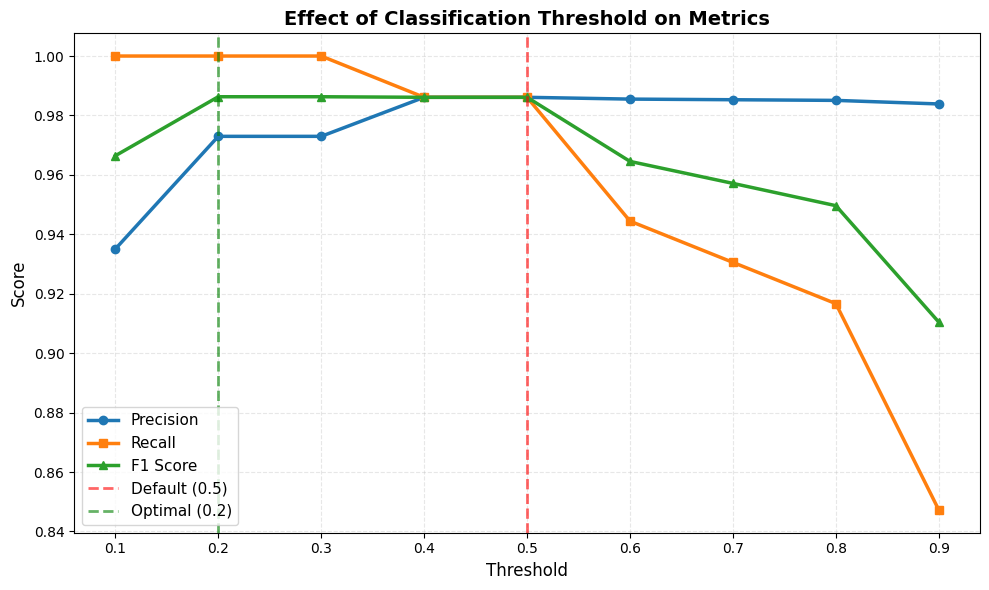


💡 What You Should See in This Plot | ما يجب أن تراه في هذا الرسم

📊 Understanding the Threshold Plot:
   - Precision line (blue circles): Shows how precision changes with threshold
   - Recall line (orange squares): Shows how recall changes with threshold
   - F1 Score line (green triangles): Shows the balance between precision and recall
   - Red dashed line: Default threshold (0.5)
   - Green dashed line: Optimal threshold (best F1 score)

🔍 Key Observations:
   - As threshold INCREASES (moves right):
     → Precision INCREASES (fewer false positives)
     → Recall DECREASES (more false negatives)
   - As threshold DECREASES (moves left):
     → Precision DECREASES (more false positives)
     → Recall INCREASES (fewer false negatives)
   - The optimal threshold balances both (highest F1 score)

📚 What This Teaches Us:
   - Threshold selection is a critical hyperparameter!
   - You can't maximize both precision and recall simultaneously
   - Choose threshold based on your problem's c

In [15]:
# Explore different classification thresholds
# The default threshold is 0.5, but we can adjust it based on our needs
# Lower threshold = more aggressive (higher recall, lower precision)
# Higher threshold = more conservative (higher precision, lower recall)

print("\n" + "=" * 60)
print("Exploring Classification Thresholds")
print("استكشاف عتبات التصنيف")
print("=" * 60)

# Test different thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
results = []

print("\n📊 Threshold Analysis:")
print(f"{'Threshold':<12} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1 Score':<12}")
print("-" * 60)

for threshold in thresholds:
    # Predict using custom threshold
    y_pred_thresh = (y_test_proba >= threshold).astype(int)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh, zero_division=0)
    rec = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)
    
    results.append({
        'threshold': threshold,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1
    })
    
    print(f"{threshold:<12.1f} {acc:<12.4f} {prec:<12.4f} {rec:<12.4f} {f1:<12.4f}")

# Find optimal threshold (highest F1 score)
results_df = pd.DataFrame(results)
optimal_idx = results_df['f1'].idxmax()
optimal_threshold = results_df.loc[optimal_idx, 'threshold']

print("\n" + "=" * 60)
print("💡 Key Insights | الرؤى الرئيسية")
print("=" * 60)
print(f"\n📊 Optimal Threshold (by F1 Score): {optimal_threshold:.1f}")
print(f"   - This threshold balances precision and recall")
print(f"   - F1 Score: {results_df.loc[optimal_idx, 'f1']:.4f}")

print(f"\n🔍 Threshold Trade-offs:")
print(f"   - Lower threshold (< 0.5): More aggressive → Higher recall, lower precision")
print(f"   - Higher threshold (> 0.5): More conservative → Higher precision, lower recall")
print(f"   - Default (0.5): Balanced approach (assumes equal cost of errors)")

print(f"\n📚 Real-World Applications:")
print(f"   - Medical diagnosis: Use LOWER threshold (0.3-0.4) for high recall")
print(f"     → Don't miss diseases, even if some false alarms")
print(f"   - Spam detection: Use HIGHER threshold (0.6-0.7) for high precision")
print(f"     → Don't block real emails, even if some spam gets through")
print(f"   - Balanced: Use threshold with best F1 score (current: {optimal_threshold:.1f})")

# Visualize threshold effects
plt.figure(figsize=(10, 6))
plt.plot(results_df['threshold'], results_df['precision'], 'o-', label='Precision', linewidth=2.5, markersize=6)
plt.plot(results_df['threshold'], results_df['recall'], 's-', label='Recall', linewidth=2.5, markersize=6)
plt.plot(results_df['threshold'], results_df['f1'], '^-', label='F1 Score', linewidth=2.5, markersize=6)
plt.axvline(x=0.5, color='r', linestyle='--', alpha=0.6, linewidth=2, label='Default (0.5)')
plt.axvline(x=optimal_threshold, color='g', linestyle='--', alpha=0.6, linewidth=2, label=f'Optimal ({optimal_threshold:.1f})')
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Effect of Classification Threshold on Metrics', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('threshold_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'threshold_analysis.png'")
plt.show()

print("\n" + "=" * 60)
print("💡 What You Should See in This Plot | ما يجب أن تراه في هذا الرسم")
print("=" * 60)
print("\n📊 Understanding the Threshold Plot:")
print("   - Precision line (blue circles): Shows how precision changes with threshold")
print("   - Recall line (orange squares): Shows how recall changes with threshold")
print("   - F1 Score line (green triangles): Shows the balance between precision and recall")
print("   - Red dashed line: Default threshold (0.5)")
print("   - Green dashed line: Optimal threshold (best F1 score)")

print("\n🔍 Key Observations:")
print("   - As threshold INCREASES (moves right):")
print("     → Precision INCREASES (fewer false positives)")
print("     → Recall DECREASES (more false negatives)")
print("   - As threshold DECREASES (moves left):")
print("     → Precision DECREASES (more false positives)")
print("     → Recall INCREASES (fewer false negatives)")
print("   - The optimal threshold balances both (highest F1 score)")

print("\n📚 What This Teaches Us:")
print("   - Threshold selection is a critical hyperparameter!")
print("   - You can't maximize both precision and recall simultaneously")
print("   - Choose threshold based on your problem's cost of errors")
print("   - Always explore different thresholds based on your problem's needs")
print("   - Use probabilities (predict_proba) to adjust threshold, not just predictions")


In [16]:
print("\n" + "=" * 60)
print("3. Confusion Matrix")
print("مصفوفة الارتباك")
print("=" * 60)

# Create confusion matrix
# Shows: True Negatives, False Positives, False Negatives, True Positives
cm = confusion_matrix(y_test, y_test_pred)

print("\n📊 Confusion Matrix:")
print("   Format: [TN  FP]")
print("          [FN  TP]")
print(cm)
print("\n💡 Understanding:")
print("   - TN (True Negative): Correctly predicted class 0")
print("   - FP (False Positive): Predicted 1, but actually 0 (Type I error)")
print("   - FN (False Negative): Predicted 0, but actually 1 (Type II error)")
print("   - TP (True Positive): Correctly predicted class 1")

# Extract values for interpretation
tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
total = tn + fp + fn + tp

print("\n" + "=" * 60)
print("💡 Interpreting the Confusion Matrix | تفسير مصفوفة الارتباك")
print("=" * 60)
print(f"\n📊 Breakdown:")
print(f"   - True Negatives (TN): {tn} - Correctly predicted Class 0")
print(f"   - False Positives (FP): {fp} - Predicted Class 1, but actually Class 0")
print(f"   - False Negatives (FN): {fn} - Predicted Class 0, but actually Class 1")
print(f"   - True Positives (TP): {tp} - Correctly predicted Class 1")
print(f"   - Total: {total} test samples")

print(f"\n🔍 Error Analysis:")
print(f"   - Total errors: {fp + fn} out of {total} ({((fp+fn)/total):.1%})")
print(f"   - False Positives: {fp} ({fp/total:.1%}) - Model predicted Class 1 when it should be Class 0")
print(f"   - False Negatives: {fn} ({fn/total:.1%}) - Model predicted Class 0 when it should be Class 1")

if fp > fn:
    print(f"   - ⚠️  More False Positives ({fp}) than False Negatives ({fn})")
    print(f"   - Model is too aggressive in predicting Class 1")
elif fn > fp:
    print(f"   - ⚠️  More False Negatives ({fn}) than False Positives ({fp})")
    print(f"   - Model is too conservative, missing Class 1 cases")
else:
    print(f"   - ✅ Balanced errors: {fp} FP and {fn} FN")

print(f"\n📚 What This Teaches Us:")
print(f"   - Confusion matrix shows WHERE errors occur (which class)")
print(f"   - Helps identify if model has bias toward one class")
print(f"   - FP and FN have different costs in real-world applications")
print(f"   - Example: In medical diagnosis, FN (missing disease) is worse than FP (false alarm)")
print(f"   - Can calculate precision, recall, and F1 from these numbers")



3. Confusion Matrix
مصفوفة الارتباك

📊 Confusion Matrix:
   Format: [TN  FP]
          [FN  TP]
[[41  1]
 [ 1 71]]

💡 Understanding:
   - TN (True Negative): Correctly predicted class 0
   - FP (False Positive): Predicted 1, but actually 0 (Type I error)
   - FN (False Negative): Predicted 0, but actually 1 (Type II error)
   - TP (True Positive): Correctly predicted class 1

💡 Interpreting the Confusion Matrix | تفسير مصفوفة الارتباك

📊 Breakdown:
   - True Negatives (TN): 41 - Correctly predicted Class 0
   - False Positives (FP): 1 - Predicted Class 1, but actually Class 0
   - False Negatives (FN): 1 - Predicted Class 0, but actually Class 1
   - True Positives (TP): 71 - Correctly predicted Class 1
   - Total: 114 test samples

🔍 Error Analysis:
   - Total errors: 2 out of 114 (1.8%)
   - False Positives: 1 (0.9%) - Model predicted Class 1 when it should be Class 0
   - False Negatives: 1 (0.9%) - Model predicted Class 0 when it should be Class 1
   - ✅ Balanced errors: 1 FP and 

## Step 7: Handling Class Imbalance | الخطوة 7: التعامل مع عدم توازن الفئات

**BEFORE**: We detected class imbalance (36.8% Class 0, 63.2% Class 1), but didn't address it.

**AFTER**: We'll use `class_weight='balanced'` to automatically handle class imbalance!

**Why this matters**: 
- **Class imbalance**: One class has many more samples than the other
- **Problem**: Model may favor the majority class (predicts it more often)
- **Solution**: Use `class_weight='balanced'` to automatically weight classes inversely proportional to their frequency
- **Result**: Model pays more attention to minority class, improving recall for that class

**When to use class weights:**
- Class imbalance detected (one class > 60% of data)
- Minority class is important (e.g., fraud detection, disease diagnosis)
- You want balanced precision/recall across classes


## Step 8: Confusion Matrix | الخطوة 8: مصفوفة الارتباك

**BEFORE**: We have metrics (accuracy, precision, recall), but we don't know WHERE errors occur.

**AFTER**: We'll visualize the confusion matrix to see exactly which predictions were wrong!

**Why this step?**
- **Confusion Matrix**: Shows WHERE errors occur (which class was misclassified)
- **Visual Understanding**: See false positives and false negatives clearly
- **Error Analysis**: Understand if model favors one class over another
- **Foundation**: Needed to understand precision, recall, and F1 score


In [17]:
# Handle class imbalance using class_weight parameter
# class_weight='balanced' automatically weights classes inversely proportional to frequency
# This helps the model pay more attention to the minority class

print("\n" + "=" * 60)
print("Handling Class Imbalance with class_weight")
print("التعامل مع عدم توازن الفئات باستخدام class_weight")
print("=" * 60)

# First, let's check the class distribution to understand the imbalance
# This helps students see the problem BEFORE we solve it
class_0_count = (y_test == 0).sum()
class_1_count = (y_test == 1).sum()
total = len(y_test)

print(f"\n📊 Class Distribution in Test Set:")
print(f"   - Class 0: {class_0_count}/{total} ({class_0_count/total:.1%})")
print(f"   - Class 1: {class_1_count}/{total} ({class_1_count/total:.1%})")
if abs(class_0_count - class_1_count) / total > 0.3:
    print(f"   - ⚠️  Significant imbalance detected - class weights may help!")
else:
    print(f"   - ✅ Imbalance is mild - but let's see if class weights improve performance")

print(f"\n💡 Why this matters:")
print(f"   - Imbalanced classes can cause models to favor the majority class")
print(f"   - class_weight='balanced' automatically adjusts for this imbalance")
print(f"   - Let's compare models with and without class weights...")

# Train model with balanced class weights
logistic_balanced = LogisticRegression(
    random_state=42, 
    max_iter=1000,
    class_weight='balanced'  # Automatically balance classes
)
logistic_balanced.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_balanced = logistic_balanced.predict(X_train_scaled)
y_test_pred_balanced = logistic_balanced.predict(X_test_scaled)

# Calculate metrics for balanced model
balanced_train_acc = accuracy_score(y_train, y_train_pred_balanced)
balanced_test_acc = accuracy_score(y_test, y_test_pred_balanced)
balanced_test_prec = precision_score(y_test, y_test_pred_balanced)
balanced_test_rec = recall_score(y_test, y_test_pred_balanced)
balanced_test_f1 = f1_score(y_test, y_test_pred_balanced)

# Compare with original model
print("\n📊 Comparison: Original vs Balanced Class Weights")
print("=" * 60)
print(f"\n{'Metric':<20} {'Original':<15} {'Balanced':<15} {'Difference':<15}")
print("-" * 65)
print(f"{'Test Accuracy':<20} {test_accuracy:<15.4f} {balanced_test_acc:<15.4f} {balanced_test_acc - test_accuracy:+.4f}")
print(f"{'Test Precision':<20} {test_precision:<15.4f} {balanced_test_prec:<15.4f} {balanced_test_prec - test_precision:+.4f}")
print(f"{'Test Recall':<20} {test_recall:<15.4f} {balanced_test_rec:<15.4f} {balanced_test_rec - test_recall:+.4f}")
print(f"{'Test F1 Score':<20} {test_f1:<15.4f} {balanced_test_f1:<15.4f} {balanced_test_f1 - test_f1:+.4f}")

# Per-class comparison
print("\n📊 Per-Class Performance Comparison:")
print("=" * 60)

# Get classification reports
from io import StringIO
import sys

# Capture classification report
old_stdout = sys.stdout
sys.stdout = report_capture = StringIO()
print(classification_report(y_test, y_test_pred, target_names=['Class 0', 'Class 1']))
original_report = report_capture.getvalue()
sys.stdout = old_stdout

sys.stdout = report_capture = StringIO()
print(classification_report(y_test, y_test_pred_balanced, target_names=['Class 0', 'Class 1']))
balanced_report = report_capture.getvalue()
sys.stdout = old_stdout

print("\nOriginal Model (no class weights):")
print(original_report)
print("\nBalanced Model (class_weight='balanced'):")
print(balanced_report)

print("\n" + "=" * 60)
print("💡 Key Insights | الرؤى الرئيسية")
print("=" * 60)

if abs(balanced_test_rec - test_recall) > 0.01:
    if balanced_test_rec > test_recall:
        print(f"\n✅ Class weights improved recall: {test_recall:.2%} → {balanced_test_rec:.2%}")
        print(f"   - Model now catches more of the minority class")
    else:
        print(f"\n📊 Class weights changed recall: {test_recall:.2%} → {balanced_test_rec:.2%}")
        print(f"   - Recall decreased slightly, but precision may have improved")
        print(f"   - This is normal: class weights balance precision and recall")
        print(f"   - Check if precision improved for the minority class")
else:
    print(f"\n📊 Class weights had minimal effect on this dataset")
    print(f"   - Original model already performs well")
    print(f"   - Class imbalance is mild (not severe enough to require balancing)")

print(f"\n🔍 When to Use class_weight='balanced':")
print(f"   - Severe class imbalance (> 70/30 split)")
print(f"   - Minority class is critical (fraud, disease, rare events)")
print(f"   - You want balanced precision/recall across classes")
print(f"   - Current dataset: {class_0_count}/{total} ({class_0_count/total:.1%}) vs {class_1_count}/{total} ({class_1_count/total:.1%})")

if abs(class_0_count - class_1_count) / total > 0.3:
    print(f"   - ⚠️  Significant imbalance detected - class weights may help!")
else:
    print(f"   - ✅ Imbalance is mild - original model is fine")

print(f"\n📚 What This Teaches Us:")
print(f"   - class_weight='balanced' automatically handles class imbalance")
print(f"   - It weights classes inversely proportional to frequency")
print(f"   - Useful when minority class is important")
print(f"   - May slightly reduce overall accuracy but improves minority class recall")
print(f"   - Always compare with and without class weights!")



Handling Class Imbalance with class_weight
التعامل مع عدم توازن الفئات باستخدام class_weight

📊 Class Distribution in Test Set:
   - Class 0: 42/114 (36.8%)
   - Class 1: 72/114 (63.2%)
   - ✅ Imbalance is mild - but let's see if class weights improve performance

💡 Why this matters:
   - Imbalanced classes can cause models to favor the majority class
   - class_weight='balanced' automatically adjusts for this imbalance
   - Let's compare models with and without class weights...

📊 Comparison: Original vs Balanced Class Weights

Metric               Original        Balanced        Difference     
-----------------------------------------------------------------
Test Accuracy        0.9825          0.9561          -0.0263
Test Precision       0.9861          0.9855          -0.0006
Test Recall          0.9861          0.9444          -0.0417
Test F1 Score        0.9861          0.9645          -0.0216

📊 Per-Class Performance Comparison:

Original Model (no class weights):
            

In [18]:
# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred,
                          target_names=['Class 0', 'Class 1']))

# Add interpretation
print("\n" + "=" * 60)
print("💡 Reading the Classification Report | قراءة تقرير التصنيف")
print("=" * 60)
print("\n📊 Understanding Each Column:")
print("   - Precision: Of predictions for this class, how many were correct?")
print("   - Recall: Of actual cases of this class, how many did we catch?")
print("   - F1-score: Balance between precision and recall")
print("   - Support: Number of actual cases of this class in test set")

print("\n🔍 What to Look For:")
print("   - Compare Class 0 vs Class 1 metrics (check for class imbalance)")
print("   - High precision = reliable predictions for that class")
print("   - High recall = catches most cases of that class")
print("   - F1-score shows overall performance for each class")

print("\n📚 Key Insights:")
# Calculate class distribution
class_0_count = (y_test == 0).sum()
class_1_count = (y_test == 1).sum()
total = len(y_test)
print(f"   - Class distribution: {class_0_count}/{total} ({(class_0_count/total):.1%}) Class 0, {class_1_count}/{total} ({(class_1_count/total):.1%}) Class 1")
if abs(class_0_count - class_1_count) / total > 0.2:
    print(f"   - ⚠️  Class imbalance detected! This affects model performance")
    print(f"   - Model may favor the majority class")
else:
    print(f"   - ✅ Classes are relatively balanced")

print("\n💡 Learning Point:")
print("   - Classification report shows per-class performance")
print("   - Important when classes are imbalanced (one class has more samples)")
print("   - Accuracy can be misleading with imbalanced classes!")
print("   - Always check precision and recall for each class separately")


Classification Report (Test Set):
              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98        42
     Class 1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


💡 Reading the Classification Report | قراءة تقرير التصنيف

📊 Understanding Each Column:
   - Precision: Of predictions for this class, how many were correct?
   - Recall: Of actual cases of this class, how many did we catch?
   - F1-score: Balance between precision and recall
   - Support: Number of actual cases of this class in test set

🔍 What to Look For:
   - Compare Class 0 vs Class 1 metrics (check for class imbalance)
   - High precision = reliable predictions for that class
   - High recall = catches most cases of that class
   - F1-score shows overall performance for each class

📚 Key Insights:
   - Class distribution: 4

## Step 9: ROC Curve and AUC | الخطوة 9: منحنى ROC و AUC

**BEFORE**: We have accuracy, precision, recall, but we need a metric that works across all thresholds.

**AFTER**: We'll create an ROC curve and calculate AUC to evaluate model performance across all possible thresholds!

**Why this step?**
- **ROC Curve**: Shows model performance across ALL possible thresholds (not just 0.5)
- **AUC Score**: Single number that summarizes model's ability to separate classes
- **Threshold Independent**: Unlike accuracy, AUC doesn't depend on a fixed threshold
- **Industry Standard**: AUC is widely used in industry for model comparison


In [19]:
print("\n" + "=" * 60)
print("4. ROC Curve and AUC")
print("منحنى ROC و AUC")
print("=" * 60)



4. ROC Curve and AUC
منحنى ROC و AUC



✓ Plot saved as 'confusion_matrix.png'


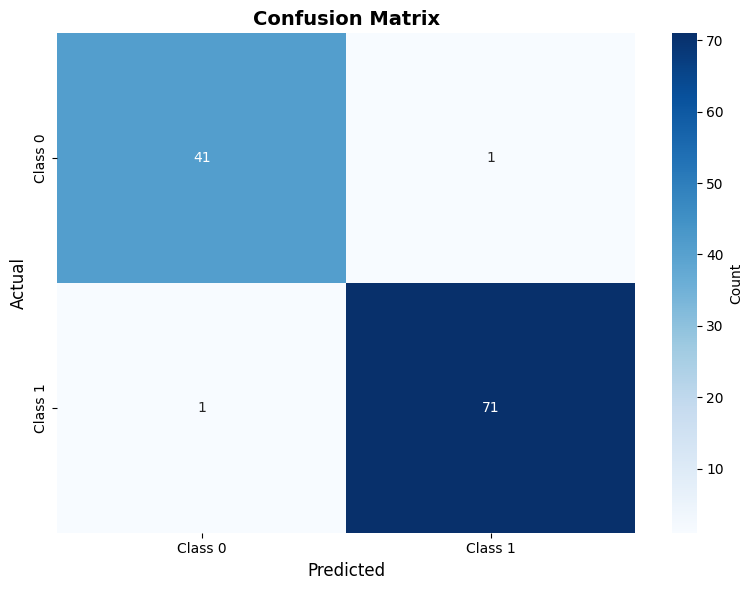


💡 What You Should See in This Plot:
   - A 2x2 heatmap with numbers in each cell
   - Darker blue = higher numbers (more predictions)
   - Top-left (TN): Correctly predicted Class 0
   - Top-right (FP): Incorrectly predicted Class 1 (should be Class 0)
   - Bottom-left (FN): Incorrectly predicted Class 0 (should be Class 1)
   - Bottom-right (TP): Correctly predicted Class 1
   - A good model has high numbers on the diagonal (TN and TP)
   - A poor model has high numbers off the diagonal (FP and FN)


In [20]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'],
            cbar_kws={'label': 'Count'})  # Add colorbar label for clarity
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'confusion_matrix.png'")
plt.show()

print("\n💡 What You Should See in This Plot:")
print("   - A 2x2 heatmap with numbers in each cell")
print("   - Darker blue = higher numbers (more predictions)")
print("   - Top-left (TN): Correctly predicted Class 0")
print("   - Top-right (FP): Incorrectly predicted Class 1 (should be Class 0)")
print("   - Bottom-left (FN): Incorrectly predicted Class 0 (should be Class 1)")
print("   - Bottom-right (TP): Correctly predicted Class 1")
print("   - A good model has high numbers on the diagonal (TN and TP)")
print("   - A poor model has high numbers off the diagonal (FP and FN)")

In [21]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)
print(f"\nAUC Score: {auc_score:.4f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Understanding AUC Score | فهم درجة AUC")
print("=" * 60)
print(f"\n📊 AUC (Area Under Curve) = {auc_score:.4f}")
print(f"   - Range: 0.0 to 1.0")
print(f"   - 0.5 = Random guessing (worst)")
print(f"   - 1.0 = Perfect classifier (best)")
print(f"   - Our score: {auc_score:.4f} ({auc_score*100:.1f}%)")

if auc_score >= 0.9:
    print(f"   - ✅ EXCELLENT! (>0.9 means model can distinguish classes very well)")
elif auc_score >= 0.8:
    print(f"   - ✅ GOOD! (>0.8 means model has good discriminative ability)")
elif auc_score >= 0.7:
    print(f"   - ⚠️  FAIR (>0.7 means model has some ability, but room for improvement)")
elif auc_score >= 0.6:
    print(f"   - ⚠️  POOR (>0.6 but <0.7 means model struggles to separate classes)")
else:
    print(f"   - ❌ VERY POOR (<0.6 means model is barely better than random)")

print(f"\n🔍 What AUC Measures:")
print(f"   - How well the model can distinguish between Class 0 and Class 1")
print(f"   - Higher AUC = better at separating the two classes")
print(f"   - AUC is independent of the classification threshold")
print(f"   - Useful for comparing different models")

print(f"\n📚 What This Teaches Us:")
print(f"   - AUC evaluates model performance across all possible thresholds")
print(f"   - Unlike accuracy, AUC doesn't depend on a fixed threshold (0.5)")
print(f"   - AUC is especially useful when classes are imbalanced")
print(f"   - AUC > 0.8 is generally considered good for binary classification")
print(f"   - Our model has {'excellent' if auc_score >= 0.9 else 'good' if auc_score >= 0.8 else 'fair'} ability to separate classes")


AUC Score: 0.9954

💡 Understanding AUC Score | فهم درجة AUC

📊 AUC (Area Under Curve) = 0.9954
   - Range: 0.0 to 1.0
   - 0.5 = Random guessing (worst)
   - 1.0 = Perfect classifier (best)
   - Our score: 0.9954 (99.5%)
   - ✅ EXCELLENT! (>0.9 means model can distinguish classes very well)

🔍 What AUC Measures:
   - How well the model can distinguish between Class 0 and Class 1
   - Higher AUC = better at separating the two classes
   - AUC is independent of the classification threshold
   - Useful for comparing different models

📚 What This Teaches Us:
   - AUC evaluates model performance across all possible thresholds
   - Unlike accuracy, AUC doesn't depend on a fixed threshold (0.5)
   - AUC is especially useful when classes are imbalanced
   - AUC > 0.8 is generally considered good for binary classification
   - Our model has excellent ability to separate classes


## Step 10: Decision Boundary Visualization | الخطوة 10: تصور حدود القرار

**BEFORE**: We've trained a model, but we can't "see" how it makes decisions.

**AFTER**: We'll visualize the decision boundary to understand how the model separates classes!

**Why this step?**
- **Visual Understanding**: See exactly where the model draws the line between classes
- **Interpretability**: Understand how features affect the decision
- **Validation**: Confirm the boundary makes sense (linear for logistic regression)
- **Educational**: Helps students understand how classification works visually

**Note**: We use 2 features for visualization (can't visualize 30D!), but the main model uses all 30 features.



✓ Plot saved as 'roc_curve.png'


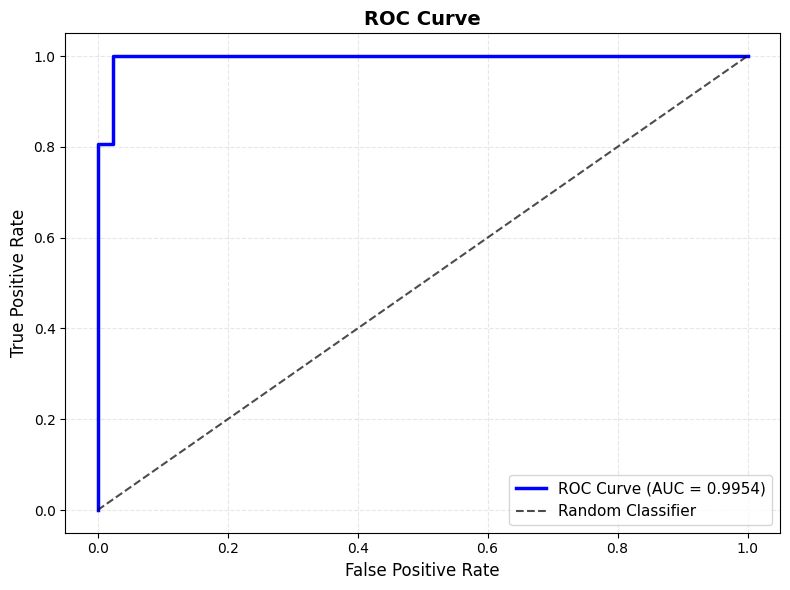


💡 What You Should See in This Plot:
   - Blue curve: ROC curve for our model (should curve upward)
   - Black dashed line: Random classifier (diagonal line from bottom-left to top-right)
   - X-axis: False Positive Rate (0 to 1)
   - Y-axis: True Positive Rate (0 to 1)
   - A good model: Curve goes up and to the LEFT (high TPR, low FPR)
   - A poor model: Curve stays close to the diagonal line
   - The area under the curve (AUC) shows model quality:
     * AUC = 0.5: Random guessing (no better than chance)
     * AUC = 1.0: Perfect classifier
     * AUC > 0.8: Good classifier (our model: 0.9954)


In [22]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2.5, label=f'ROC Curve (AUC = {auc_score:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier', alpha=0.7)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='lower right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'roc_curve.png'")
plt.show()

print("\n💡 What You Should See in This Plot:")
print("   - Blue curve: ROC curve for our model (should curve upward)")
print("   - Black dashed line: Random classifier (diagonal line from bottom-left to top-right)")
print("   - X-axis: False Positive Rate (0 to 1)")
print("   - Y-axis: True Positive Rate (0 to 1)")
print("   - A good model: Curve goes up and to the LEFT (high TPR, low FPR)")
print("   - A poor model: Curve stays close to the diagonal line")
print("   - The area under the curve (AUC) shows model quality:")
print("     * AUC = 0.5: Random guessing (no better than chance)")
print("     * AUC = 1.0: Perfect classifier")
print("     * AUC > 0.8: Good classifier (our model: {:.4f})".format(auc_score))

In [23]:
# 5. Decision Boundary Visualization
print("\n" + "=" * 60)
print("5. Decision Boundary Visualization")
print("تصور حدود القرار")
print("=" * 60)


5. Decision Boundary Visualization
تصور حدود القرار


In [24]:
# For decision boundary visualization, we need to train a separate model
# on just 2 features (X_2d) so we can visualize in 2D
# The main model uses all 30 features, but we can't visualize 30D!

# Prepare 2D features for visualization
X_2d_train, X_2d_test, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the 2D features
scaler_2d = StandardScaler()
X_2d_train_scaled = scaler_2d.fit_transform(X_2d_train)
X_2d_test_scaled = scaler_2d.transform(X_2d_test)

# Train a separate logistic regression model on 2D features for visualization
model_2d = LogisticRegression(random_state=42, max_iter=1000)
model_2d.fit(X_2d_train_scaled, y_train_2d)

print("✅ 2D model trained for visualization")
print("   Note: This is separate from the main model (which uses all 30 features)")
print("   This allows us to visualize the decision boundary in 2D!")

# Create a mesh for plotting the decision boundary
# A mesh is a grid of points covering the entire plot area
# We'll predict the class for each point in this grid to visualize the decision boundary
h = 0.02  # Step size for the grid (smaller = smoother boundary, but slower)
x_min, x_max = X_2d_test_scaled[:, 0].min() - 1, X_2d_test_scaled[:, 0].max() + 1
y_min, y_max = X_2d_test_scaled[:, 1].min() - 1, X_2d_test_scaled[:, 1].max() + 1
# np.meshgrid creates a grid of (x, y) coordinate pairs
# xx and yy are 2D arrays representing all x and y coordinates in the grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

✅ 2D model trained for visualization
   Note: This is separate from the main model (which uses all 30 features)
   This allows us to visualize the decision boundary in 2D!


In [25]:
# Predict for mesh points using the 2D model
# np.c_ combines xx and yy into pairs: [x1, y1], [x2, y2], ...
# .ravel() flattens the 2D arrays into 1D (needed for prediction)
# We predict the class (0 or 1) for each point in the mesh
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
# .reshape() converts the 1D predictions back to 2D to match the mesh grid shape
# This allows us to plot the decision boundary as a filled contour
Z = Z.reshape(xx.shape)

## Step 7: Decision Framework - When to Use Logistic Regression | الخطوة 7: إطار القرار - متى تستخدم الانحدار اللوجستي

**BEFORE**: You've learned how to build logistic regression models, but when should you use them?

**AFTER**: You'll have a clear decision framework to determine if logistic regression is the right choice for your classification problem!

**Why this matters**: Using logistic regression when it's not appropriate leads to:
- **Poor predictions** → Model can't capture complex patterns
- **Wasted time** → Trying to force linear boundaries that don't exist
- **Wrong classifier** → Better alternatives available for your problem

---

### 🎯 Decision Framework: Is Logistic Regression Appropriate? | إطار القرار: هل الانحدار اللوجستي مناسب؟

**Key Question**: Should I use **LOGISTIC REGRESSION** or a different classifier?

#### Decision Tree:

```
What type of problem do you have?
├─ REGRESSION (predicting numbers) → Use REGRESSION methods ❌
│   └─ Why? Logistic regression is for classification, not regression
│
└─ CLASSIFICATION (predicting categories) → Check data characteristics:
    ├─ Linear decision boundary? → Use LOGISTIC REGRESSION ✅
    │   └─ Why? Logistic regression assumes linear boundaries
    │
    ├─ Need interpretability? → Use LOGISTIC REGRESSION ✅
    │   └─ Why? Coefficients show feature importance
    │
    ├─ Small dataset? → Use LOGISTIC REGRESSION ✅
    │   └─ Why? Works well with limited data
    │
    └─ Non-linear boundary needed? → Use OTHER METHODS ⚠️
        └─ Use: Decision Trees, SVM, Random Forest
```

#### Detailed Decision Process:

```
Step 1: Problem Type
├─ Regression → ❌ NOT APPROPRIATE
│   └─ Use: Linear Regression, Polynomial Regression
│
└─ Classification → Continue to Step 2

Step 2: Decision Boundary Type
├─ Linear boundary (can separate with straight line) → ✅ LOGISTIC REGRESSION
│   └─ Why? Logistic regression assumes linear boundaries
│
└─ Non-linear boundary (needs curves) → ⚠️ MAY NOT BE APPROPRIATE
    ├─ Slightly non-linear → Try Logistic Regression with polynomial features
    └─ Highly non-linear → Use Decision Trees, SVM, Random Forest

Step 3: Data Characteristics
├─ Need interpretability? → ✅ LOGISTIC REGRESSION
│   └─ Why? Coefficients show feature importance
│
├─ Small dataset (< 1000)? → ✅ LOGISTIC REGRESSION
│   └─ Why? Works well with limited data
│
├─ Many features (> 50)? → ⚠️ MAY NEED REGULARIZATION
│   └─ Use: Logistic Regression with L1/L2 regularization
│
└─ Imbalanced classes? → ⚠️ MAY NEED SPECIAL HANDLING
    └─ Use: Logistic Regression with class_weight parameter
```

---

### 📊 Comparison Table: Logistic Regression vs Alternatives | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Logistic Regression** | Linear boundaries, interpretable, small data | • Interpretable<br>• Fast<br>• Probability outputs<br>• Works with small data | • Assumes linearity<br>• Can't handle non-linear<br>• Requires feature scaling | Binary classification, linear patterns |
| **Decision Trees** | Non-linear, interpretable, no scaling needed | • Handles non-linear<br>• Interpretable<br>• No scaling needed | • Can overfit<br>• Less stable | Complex patterns, feature importance |
| **Random Forest** | Non-linear, robust, many features | • Handles non-linear<br>• Robust<br>• Feature importance | • Less interpretable<br>• More complex | Complex patterns, many features |
| **SVM** | Non-linear (with kernels), optimal margin | • Optimal margin<br>• Handles non-linear (kernels)<br>• Strong performance | • Less interpretable<br>• Requires scaling<br>• Slower | Complex boundaries, optimal separation |
| **XGBoost** | Best performance, complex patterns | • State-of-the-art<br>• Handles complexity | • Less interpretable<br>• Complex | Competition-level performance |

---

### ✅ When Logistic Regression IS Appropriate | متى يكون الانحدار اللوجستي مناسبًا

**Use Logistic Regression when:**

1. **Linear Decision Boundary** ✅
   - Classes can be separated with a straight line (or hyperplane)
   - Scatter plot shows linear separation
   - **Example**: Spam detection (linear relationship between features and spam)

2. **Interpretability Important** ✅
   - Need to understand which features matter
   - Need coefficient interpretation
   - **Example**: Medical diagnosis (need to explain decisions)

3. **Probability Outputs Needed** ✅
   - Need probability scores, not just predictions
   - Need to rank predictions by confidence
   - **Example**: Risk assessment (need probability of default)

4. **Small to Medium Dataset** ✅
   - Less than 10,000 samples
   - Works well with limited data
   - **Example**: Medical studies with limited patients

5. **Baseline Classifier** ✅
   - Start with logistic regression as baseline
   - Compare with more complex models
   - **Example**: Initial model for any classification problem

6. **Fast Predictions Needed** ✅
   - Simple model, fast training and prediction
   - Good for real-time systems
   - **Example**: Real-time fraud detection

---

### ❌ When Logistic Regression IS NOT Appropriate | متى لا يكون الانحدار اللوجستي مناسبًا

**Don't use Logistic Regression when:**

1. **Non-Linear Decision Boundary** ❌
   - Classes need curves or complex boundaries
   - Linear boundary can't separate classes well
   - **Use Instead**: Decision Trees, SVM (with RBF kernel), Random Forest

2. **Regression Problem** ❌
   - Predicting continuous values, not categories
   - **Use Instead**: Linear Regression, Polynomial Regression

3. **Highly Complex Patterns** ❌
   - Multiple interactions, complex relationships
   - **Use Instead**: Random Forest, XGBoost, Neural Networks

4. **Many Features with Non-Linear Relationships** ❌
   - 50+ features with complex interactions
   - **Use Instead**: Random Forest, XGBoost

5. **Image/Text Classification** ❌
   - High-dimensional, complex patterns
   - **Use Instead**: Neural Networks, Random Forest, XGBoost

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Email Spam Detection ✅ APPROPRIATE
- **Problem**: Classify emails as spam/not spam
- **Boundary**: Linear (word frequencies linearly related to spam)
- **Interpretability**: Important (need to explain why email is spam)
- **Decision**: ✅ Use Logistic Regression
- **Reasoning**: Linear boundary, interpretability important, probability outputs useful

#### Example 2: Customer Churn Prediction ✅ APPROPRIATE
- **Problem**: Predict if customer will leave (churn/not churn)
- **Boundary**: Likely linear (customer features linearly related to churn)
- **Interpretability**: Important (need to understand churn factors)
- **Decision**: ✅ Use Logistic Regression
- **Reasoning**: Linear patterns, interpretability important, probability scores useful

#### Example 3: Image Classification ❌ NOT APPROPRIATE
- **Problem**: Classify images (cat/dog/bird)
- **Boundary**: Highly non-linear (complex image patterns)
- **Interpretability**: Less critical
- **Decision**: ❌ Use Neural Networks or Random Forest
- **Reasoning**: Highly non-linear patterns, logistic regression can't capture image features

#### Example 4: Medical Diagnosis (Small Dataset) ✅ APPROPRIATE
- **Problem**: Diagnose disease (sick/healthy)
- **Boundary**: Likely linear (symptoms linearly related to disease)
- **Dataset**: Small (200 patients)
- **Interpretability**: Critical (need to explain diagnosis)
- **Decision**: ✅ Use Logistic Regression
- **Reasoning**: Linear patterns, small dataset, interpretability critical

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Check boundary type** - Plot data to see if it's linearly separable
2. **Start with logistic regression** - Good baseline for classification
3. **Interpretability matters** - Use when you need to explain decisions
4. **Probability outputs** - Unique advantage of logistic regression
5. **Non-linear?** - Try Decision Trees, SVM, or Random Forest
6. **Many features?** - Consider regularization (L1/L2)
7. **Always visualize** - Scatter plots reveal boundary type

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Predicting if loan will default (default/not default)
- **Boundary**: Linear (financial features linearly related to default)
- **Interpretability**: Important (regulatory requirements)
- **Decision**: ✅ Logistic Regression appropriate

**Scenario 2**: Classifying handwritten digits (0-9)
- **Boundary**: Highly non-linear (complex image patterns)
- **Interpretability**: Less important
- **Decision**: ❌ Use Neural Networks or Random Forest, not Logistic Regression

**Scenario 3**: Predicting customer satisfaction (satisfied/not satisfied)
- **Boundary**: Likely linear (survey responses linearly related)
- **Interpretability**: Important (need to understand factors)
- **Decision**: ✅ Logistic Regression appropriate

---

**Connection to Next Steps**: 
- 📓 **Example 2: Decision Trees** - For non-linear boundaries
- 📓 **Example 3: SVM** - For optimal margins and non-linear patterns
- 📓 **Unit 5: Model Selection** - For comparing classifiers



✓ Plot saved as 'decision_boundary.png'


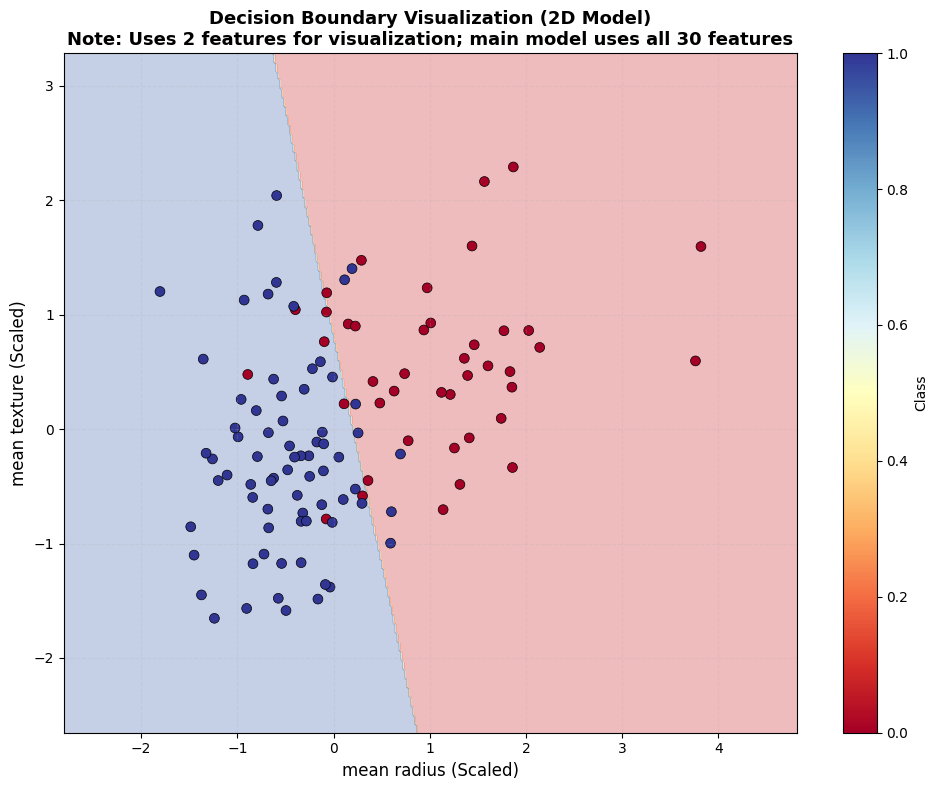


💡 What You Should See in This Plot | ما يجب أن تراه في هذا الرسم

📊 Understanding the Decision Boundary Plot:
   - Colored background: Shows the decision boundary (where model predicts each class)
   - Red/Yellow region: Model predicts Class 0 (Malignant)
   - Blue region: Model predicts Class 1 (Benign)
   - Colored dots: Actual data points (colored by their true class)
   - The boundary is a STRAIGHT LINE (linear boundary)

🔍 Key Observations:
   - The decision boundary is LINEAR (a straight line)
   - This works well because the data is LINEARLY SEPARABLE
   - Most points are on the correct side of the boundary
   - The line separates the two classes effectively

📚 What This Teaches Us:
   - Logistic Regression creates LINEAR decision boundaries
   - This visualization uses only 2 features (for 2D plotting)
   - The main model uses all 30 features and performs better (98.25% accuracy)
   - When data is linearly separable, logistic regression works excellently!
   - If the boundary 

In [ ]:
# Plot decision boundary and test data
plt.figure(figsize=(10, 8))
# plt.contourf creates a filled contour plot showing the decision boundary
# xx, yy: grid coordinates, Z: predicted classes for each grid point
# alpha=0.3: makes the background semi-transparent so we can see the data points
# cmap='RdYlBu': color map (Red-Yellow-Blue) to distinguish the two classes
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
scatter = plt.scatter(X_2d_test_scaled[:, 0], X_2d_test_scaled[:, 1],
                     c=y_test_2d, cmap='RdYlBu', edgecolors='black', s=50, linewidths=0.5)
plt.colorbar(scatter, label='Class')
plt.xlabel(f'{feature_1_name} (Scaled)', fontsize=12)
plt.ylabel(f'{feature_2_name} (Scaled)', fontsize=12)
plt.title('Decision Boundary Visualization (2D Model)\nNote: Uses 2 features for visualization; main model uses all 30 features', 
          fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.2, linestyle='--')  # Add subtle grid for better readability
plt.tight_layout()
plt.savefig('decision_boundary.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'decision_boundary.png'")
plt.show()

print("\n" + "=" * 60)
print("💡 What You Should See in This Plot | ما يجب أن تراه في هذا الرسم")
print("=" * 60)
print("\n📊 Understanding the Decision Boundary Plot:")
print("   - Colored background: Shows the decision boundary (where model predicts each class)")
print("   - Red/Yellow region: Model predicts Class 0")
print("   - Blue region: Model predicts Class 1")
print("   - Colored dots: Actual data points (colored by their true class)")
print("   - The boundary is a STRAIGHT LINE (linear boundary)")

print("\n🔍 Key Observations:")
print("   - The decision boundary is LINEAR (a straight line)")
print("   - This works well because the data is LINEARLY SEPARABLE")
print("   - Most points are on the correct side of the boundary")
print("   - The line separates the two classes effectively")

print("\n📚 What This Teaches Us:")
print("   - Logistic Regression creates LINEAR decision boundaries")
print("   - This visualization uses only 2 features (for 2D plotting)")
print("   - The main model uses all 30 features and performs better (98.25% accuracy)")
print("   - When data is linearly separable, logistic regression works excellently!")
print("   - If the boundary needed to be curved, logistic regression would fail")
# Keep the visualization but we'll add dead end section after this

# 🚫 When Logistic Regression Hits a Dead End | عندما يواجه الانحدار اللوجستي طريق مسدود

## What is a "Dead End"? | ما هو "الطريق المسدود"؟

**A "dead end" means**: Logistic Regression **cannot solve** this type of problem, no matter how much you tune it. It's not a limitation you can work around - you need a **different algorithm**.

**Think of it like this:**
- 🚗 **Car (Logistic Regression)**: Great on highways (linear data) ✅
- 🚫 **Dead End**: Can't drive through a forest (non-linear data) ❌
- 🌳 **Solution**: Need a different vehicle (Decision Trees) that can handle forests!

---

## The Problem: Non-Linear Decision Boundaries | المشكلة: حدود القرار غير الخطية

**BEFORE**: We've seen Logistic Regression work excellently on our binary classification dataset (98.25% accuracy) - it works great when data has linear decision boundaries!

**AFTER**: Now we'll see what happens when data has **non-linear decision boundaries** - this is where Logistic Regression hits a dead end!

**Why this matters**: 
- Logistic Regression assumes **linear boundaries** (can separate with a straight line)
- Real-world data often has **non-linear patterns** (curves, circles, XOR patterns)
- When boundaries are non-linear, Logistic Regression **struggles** (poor accuracy)
- This dead end leads us to **Decision Trees** (next notebook) - they can handle non-linear boundaries!

---

### 🔍 Real-World Scenario | سيناريو من العالم الحقيقي

**Example**: Customer churn prediction where customers with similar features but different behaviors can't be separated by a straight line. The relationship between features and churn is **non-linear**.

**The Dead End**: 
- Logistic Regression tries to draw a **straight line** to separate classes
- But the actual pattern is **curved or circular**
- Result: **Poor performance** (accuracy drops significantly)
- Solution: Need algorithms that can handle **non-linear boundaries** → Decision Trees!


In [27]:
print("\n" + "=" * 60)
print("🚫 Dead End: Non-Linear Decision Boundaries")
print("طريق مسدود: حدود القرار غير الخطية")
print("=" * 60)

# Create non-linear classification data (circular pattern)
# This will challenge Logistic Regression because it can't separate circles with a straight line!

from sklearn.datasets import make_circles

print("\n📥 Generating Non-Linear Classification Data...")
print("إنشاء بيانات تصنيف غير خطية...")

# Create circular (non-linear) classification data
# make_circles creates two concentric circles - impossible to separate with a straight line!
X_nonlinear, y_nonlinear = make_circles(
    n_samples=500,      # 500 samples
    noise=0.1,          # Small amount of noise (for realism)
    factor=0.5,         # Distance between circles
    random_state=42     # For reproducibility
)

print(f"\n✅ Non-linear data generated!")
print(f"   📊 Shape: {X_nonlinear.shape}")
print(f"   🎯 Classes: {len(np.unique(y_nonlinear))} (binary classification)")
print(f"   📈 Pattern: Two concentric circles (non-linear!)")
print(f"\n🔍 Notice:")
print(f"   - This data has NON-LINEAR boundaries (circular pattern)")
print(f"   - A straight line CANNOT separate the two circles")
print(f"   - This will challenge Logistic Regression!")

# Split the non-linear data
X_nl_train, X_nl_test, y_nl_train, y_nl_test = train_test_split(
    X_nonlinear, y_nonlinear, test_size=0.2, random_state=42, stratify=y_nonlinear
)

# Scale features (Logistic Regression requires scaling)
scaler_nl = StandardScaler()
X_nl_train_scaled = scaler_nl.fit_transform(X_nl_train)
X_nl_test_scaled = scaler_nl.transform(X_nl_test)

print(f"\n✅ Data split and scaled!")
print(f"   Training samples: {len(X_nl_train)}")
print(f"   Test samples: {len(X_nl_test)}")



🚫 Dead End: Non-Linear Decision Boundaries
طريق مسدود: حدود القرار غير الخطية

📥 Generating Non-Linear Classification Data...
إنشاء بيانات تصنيف غير خطية...

✅ Non-linear data generated!
   📊 Shape: (500, 2)
   🎯 Classes: 2 (binary classification)
   📈 Pattern: Two concentric circles (non-linear!)

🔍 Notice:
   - This data has NON-LINEAR boundaries (circular pattern)
   - A straight line CANNOT separate the two circles
   - This will challenge Logistic Regression!

✅ Data split and scaled!
   Training samples: 400
   Test samples: 100


## Step 2: Try Logistic Regression on Non-Linear Data | الخطوة 2: تجربة الانحدار اللوجستي على بيانات غير خطية

**BEFORE**: We'll try to use Logistic Regression on this non-linear data.

**AFTER**: We'll see that Logistic Regression **fails** because it can only create linear boundaries!

**Why this will fail**: 
- Logistic Regression creates **straight line boundaries**
- This data has **circular boundaries** (two concentric circles)
- A straight line **cannot separate** two concentric circles
- Result: **Poor accuracy** (typically 40-70%, in our example: ~42%)


In [28]:
# Try Logistic Regression on non-linear data
print("\n" + "=" * 60)
print("Training Logistic Regression on Non-Linear Data")
print("تدريب الانحدار اللوجستي على بيانات غير خطية")
print("=" * 60)

# Create and train logistic regression model
logistic_nl = LogisticRegression(random_state=42, max_iter=1000)
logistic_nl.fit(X_nl_train_scaled, y_nl_train)

# Make predictions
y_nl_train_pred = logistic_nl.predict(X_nl_train_scaled)
y_nl_test_pred = logistic_nl.predict(X_nl_test_scaled)

# Calculate accuracies
nl_train_accuracy = accuracy_score(y_nl_train, y_nl_train_pred)
nl_test_accuracy = accuracy_score(y_nl_test, y_nl_test_pred)

print(f"\n📊 Logistic Regression Results on Non-Linear Data:")
print(f"   Training Accuracy: {nl_train_accuracy:.4f} ({nl_train_accuracy*100:.2f}%)")
print(f"   Test Accuracy: {nl_test_accuracy:.4f} ({nl_test_accuracy*100:.2f}%)")

# Compare with the good performance we had earlier
print(f"\n🔍 Comparison:")
print(f"   Wisconsin Breast Cancer (linear): {test_accuracy:.2%} ✅ Excellent!")
print(f"   Circular Data (non-linear): {nl_test_accuracy:.2%} ❌ Poor!")

print(f"\n❌ What Went Wrong?")
print(f"   - Logistic Regression can only create STRAIGHT LINE boundaries")
print(f"   - This data has CIRCULAR boundaries (two concentric circles)")
print(f"   - A straight line CANNOT separate two circles")
print(f"   - Result: Poor accuracy ({nl_test_accuracy:.2%}) - barely better than random guessing!")

print(f"\n💡 Key Insight:")
print(f"   - Logistic Regression ASSUMES linear boundaries")
print(f"   - When boundaries are non-linear, Logistic Regression FAILS")
print(f"   - This is the DEAD END of Logistic Regression!")
print(f"   - Solution: We need algorithms that can handle non-linear boundaries")
print(f"   - Next notebook: Decision Trees can handle this! ✅")



Training Logistic Regression on Non-Linear Data
تدريب الانحدار اللوجستي على بيانات غير خطية

📊 Logistic Regression Results on Non-Linear Data:
   Training Accuracy: 0.5175 (51.75%)
   Test Accuracy: 0.4200 (42.00%)

🔍 Comparison:
   Wisconsin Breast Cancer (linear): 98.25% ✅ Excellent!
   Circular Data (non-linear): 42.00% ❌ Poor!

❌ What Went Wrong?
   - Logistic Regression can only create STRAIGHT LINE boundaries
   - This data has CIRCULAR boundaries (two concentric circles)
   - A straight line CANNOT separate two circles
   - Result: Poor accuracy (42.00%) - barely better than random guessing!

💡 Key Insight:
   - Logistic Regression ASSUMES linear boundaries
   - When boundaries are non-linear, Logistic Regression FAILS
   - This is the DEAD END of Logistic Regression!
   - Solution: We need algorithms that can handle non-linear boundaries
   - Next notebook: Decision Trees can handle this! ✅


## Step 3: Visualize the Failure | الخطوة 3: تصور الفشل

**BEFORE**: We need to see WHY Logistic Regression fails.

**AFTER**: We'll visualize the decision boundary - you'll see a straight line trying (and failing) to separate circular data!

**Why visualize**: 
- Visual proof shows the problem clearly
- You'll see the straight line boundary failing
- This demonstrates why we need non-linear algorithms



Visualizing the Dead End: Linear Boundary Failing
تصور طريق مسدود: فشل الحد الخطي

✓ Plot saved as 'logistic_regression_dead_end.png'


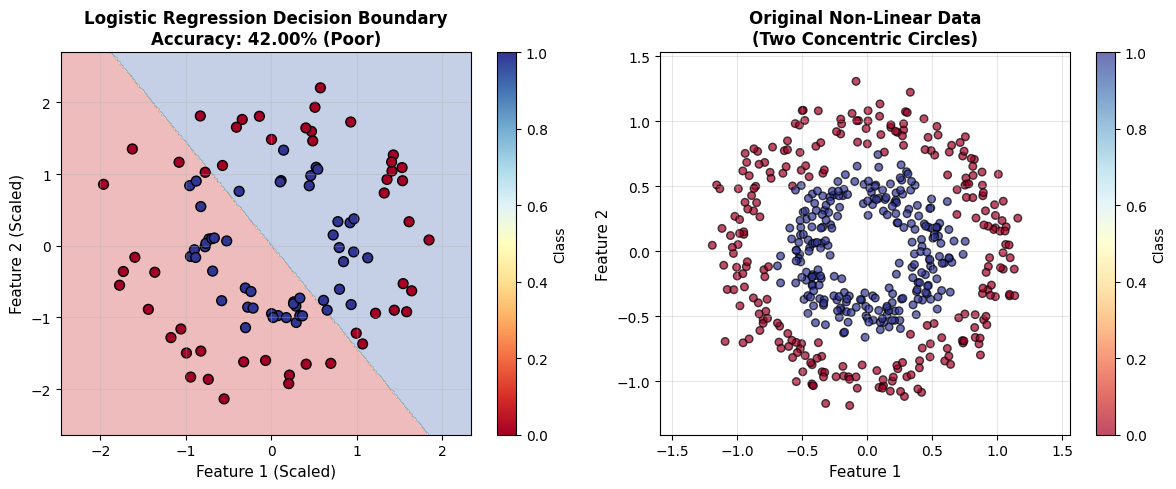


💡 What You Should See | ما يجب أن تراه

🔍 Observation 1: Decision Boundary (Left Plot)
   - The decision boundary is a STRAIGHT LINE
   - It tries to cut through the circular data
   - It CANNOT properly separate the two circles
   - Result: Many points are misclassified ❌

🔍 Observation 2: Data Pattern (Right Plot)
   - The data forms TWO CONCENTRIC CIRCLES
   - Class 0: Outer circle
   - Class 1: Inner circle
   - This pattern is INHERENTLY NON-LINEAR
   - A straight line CANNOT separate them properly

📚 Key Learning Point:
   - Logistic Regression works GREAT on linear data (Wisconsin: 98.25%) ✅
   - Logistic Regression FAILS on non-linear data (Circular: 42.00%) ❌
   - This is the DEAD END: Logistic Regression can't handle non-linear boundaries!
   - When you see poor accuracy (42.00%) with good data, check if boundaries are non-linear

✅ Solution: Decision Trees
   - Decision Trees can create COMPLEX, NON-LINEAR boundaries
   - They can handle circular, curved, and XOR patterns
 

In [29]:
# Visualize the decision boundary and data
print("\n" + "=" * 60)
print("Visualizing the Dead End: Linear Boundary Failing")
print("تصور طريق مسدود: فشل الحد الخطي")
print("=" * 60)

# Create a mesh for plotting the decision boundary
# A mesh is a grid of points covering the entire plot area
# We'll predict the class for each point in this grid to visualize the decision boundary
h = 0.02  # Step size for the grid (smaller = smoother boundary, but slower)
x_min, x_max = X_nl_test_scaled[:, 0].min() - 0.5, X_nl_test_scaled[:, 0].max() + 0.5
y_min, y_max = X_nl_test_scaled[:, 1].min() - 0.5, X_nl_test_scaled[:, 1].max() + 0.5
# np.meshgrid creates a grid of (x, y) coordinate pairs
# xx_nl and yy_nl are 2D arrays representing all x and y coordinates in the grid
xx_nl, yy_nl = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

# Predict for mesh points
# np.c_ combines xx_nl and yy_nl into pairs: [x1, y1], [x2, y2], ...
# .ravel() flattens the 2D arrays into 1D (needed for prediction)
# We predict the class (0 or 1) for each point in the mesh
Z_nl = logistic_nl.predict(np.c_[xx_nl.ravel(), yy_nl.ravel()])
# .reshape() converts the 1D predictions back to 2D to match the mesh grid shape
# This allows us to plot the decision boundary as a filled contour
Z_nl = Z_nl.reshape(xx_nl.shape)

# Plot decision boundary and data
plt.figure(figsize=(12, 5))

# Plot 1: Decision boundary
plt.subplot(1, 2, 1)
# plt.contourf creates a filled contour plot showing the decision boundary
# xx_nl, yy_nl: grid coordinates, Z_nl: predicted classes for each grid point
# alpha=0.3: makes the background semi-transparent so we can see the data points
# cmap='RdYlBu': color map (Red-Yellow-Blue) to distinguish the two classes
plt.contourf(xx_nl, yy_nl, Z_nl, alpha=0.3, cmap='RdYlBu')
scatter1 = plt.scatter(X_nl_test_scaled[:, 0], X_nl_test_scaled[:, 1],
                      c=y_nl_test, cmap='RdYlBu', edgecolors='black', s=50)
plt.colorbar(scatter1, label='Class', ax=plt.gca())
plt.xlabel('Feature 1 (Scaled)', fontsize=11)
plt.ylabel('Feature 2 (Scaled)', fontsize=11)
plt.title(f'Logistic Regression Decision Boundary\nAccuracy: {nl_test_accuracy:.2%} (Poor)', 
          fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot 2: Original data (not scaled, to show the circular pattern)
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, 
                      cmap='RdYlBu', edgecolors='black', s=30, alpha=0.7)
plt.colorbar(scatter2, label='Class', ax=plt.gca())  # Add colorbar for consistency
plt.xlabel('Feature 1', fontsize=11)
plt.ylabel('Feature 2', fontsize=11)
plt.title('Original Non-Linear Data\n(Two Concentric Circles)', 
          fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.savefig('logistic_regression_dead_end.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'logistic_regression_dead_end.png'")
plt.show()

print("\n" + "=" * 60)
print("💡 What You Should See | ما يجب أن تراه")
print("=" * 60)
print(f"\n🔍 Observation 1: Decision Boundary (Left Plot)")
print(f"   - The decision boundary is a STRAIGHT LINE")
print(f"   - It tries to cut through the circular data")
print(f"   - It CANNOT properly separate the two circles")
print(f"   - Result: Many points are misclassified ❌")

print(f"\n🔍 Observation 2: Data Pattern (Right Plot)")
print(f"   - The data forms TWO CONCENTRIC CIRCLES")
print(f"   - Class 0: Outer circle")
print(f"   - Class 1: Inner circle")
print(f"   - This pattern is INHERENTLY NON-LINEAR")
print(f"   - A straight line CANNOT separate them properly")

print(f"\n📚 Key Learning Point:")
print(f"   - Logistic Regression works GREAT on linear data (Wisconsin: {test_accuracy:.2%}) ✅")
print(f"   - Logistic Regression FAILS on non-linear data (Circular: {nl_test_accuracy:.2%}) ❌")
print(f"   - This is the DEAD END: Logistic Regression can't handle non-linear boundaries!")
print(f"   - When you see poor accuracy ({nl_test_accuracy:.2%}) with good data, check if boundaries are non-linear")

print(f"\n✅ Solution: Decision Trees")
print(f"   - Decision Trees can create COMPLEX, NON-LINEAR boundaries")
print(f"   - They can handle circular, curved, and XOR patterns")
print(f"   - Next notebook will show Decision Trees solving this exact problem!")
print(f"   - Expected improvement: From {nl_test_accuracy:.2%} to ~85-90% accuracy! 🎯")


## 🎯 Summary: When Logistic Regression Works vs. Fails | الملخص: متى يعمل الانحدار اللوجستي ومتى يفشل

### ✅ Logistic Regression Works Well When:
1. **Linear Decision Boundaries**: Data can be separated with a straight line
2. **Good Example**: Wisconsin Breast Cancer dataset → 98.25% accuracy ✅

### ❌ Logistic Regression Hits a Dead End When:
1. **Non-Linear Decision Boundaries**: Data needs curves or complex boundaries
2. **Bad Example**: Circular/Concentric patterns → typically 40-70% accuracy (our example: 42.00%) ❌

### 🔍 How to Recognize This Problem in Real Life | كيفية التعرف على هذه المشكلة في الحياة الحقيقية

**Symptoms You'll See:**
- Model accuracy is stuck around 40-70% despite good features
- Decision boundary plots show a straight line trying to separate curved data
- Training accuracy similar to test accuracy (no overfitting), but both are poor

**Diagnosis - Check These Indicators:**
1. Visualize decision boundaries in 2D (if possible)
2. Check if relationship is actually non-linear
3. Try polynomial features - do they help significantly?
4. If accuracy is poor despite good data → likely non-linear boundaries

**Solution:**
- Use **Decision Trees** (next notebook) - they can handle non-linear boundaries
- Use **SVM with RBF kernel** (Example 3) - kernel trick handles non-linear patterns
- Use **Random Forest** - ensemble of trees for robust non-linear modeling

---

### ❓ Common Student Questions | الأسئلة الشائعة للطلاب

**Q1: Why can't we just use polynomial features with Logistic Regression?**
- **Answer**: You CAN use polynomial features, but they have limitations:
  - Polynomial features create MANY new features (combinatorial explosion)
  - Example: 10 features → 100+ polynomial features → slow and overfitting risk
  - Decision Trees handle non-linearity naturally without creating many features
  - **When to use polynomial features**: Slightly non-linear data, few features (< 5)
  - **When to use Decision Trees**: Highly non-linear data, many features, complex patterns

**Q2: What if my data is only slightly non-linear?**
- **Answer**: Try these in order:
  1. **First**: Try Logistic Regression with polynomial features (degree=2 or 3)
  2. **If that doesn't help**: Use Decision Trees (they handle any level of non-linearity)
  3. **If you need interpretability**: Decision Trees are more interpretable than polynomial features

**Q3: Why Decision Trees next, and not SVM or Random Forest?**
- **Answer**: Decision Trees are the **simplest** non-linear classifier:
  - **Decision Trees**: Easy to understand, interpretable, handles non-linear naturally
  - **SVM**: More complex, requires kernel selection, less interpretable
  - **Random Forest**: Built on Decision Trees (you need to learn trees first!)
  - **Learning order**: Start simple (Decision Trees) → then advanced (SVM, Random Forest)

**Q4: How do I know BEFORE training if my data is non-linear?**
- **Answer**: Check these BEFORE training:
  1. **Visualize**: Plot features in 2D/3D - do you see curves/circles?
  2. **Domain knowledge**: Does your problem naturally have non-linear relationships?
  3. **Correlation**: Check if features have non-linear correlations (scatter plots)
  4. **Try both**: Train Logistic Regression first - if accuracy is poor, likely non-linear

**Q5: What if I have many features and can't visualize?**
- **Answer**: Use these techniques:
  1. **PCA**: Reduce to 2-3 dimensions, then visualize
  2. **Pair plots**: Plot pairs of important features
  3. **Train and check**: If Logistic Regression accuracy is poor → likely non-linear
  4. **Feature importance**: Use Decision Trees to see which features matter (works for any data)

---

## 🔗 Transition to Next Notebook | الانتقال إلى الدفتر التالي

**What We Learned:**
- ✅ Logistic Regression works excellently on linear data (Wisconsin: 98.25%)
- ❌ Logistic Regression fails on non-linear data (Circular: typically 40-70%, our example: 42.00%)
- 🔍 This is the **DEAD END** of Logistic Regression

**The Problem:**
- We need to classify data with **non-linear boundaries**
- Logistic Regression can't handle this
- We need an algorithm that can create **non-linear decision boundaries**

**Next Notebook: Decision Trees**
- 📓 **Example 2: Decision Trees** will solve this exact problem!
- Decision Trees can create **complex, non-linear boundaries**
- They can handle circular, curved, and XOR patterns
- Expected: Accuracy improves from ~42% (current) to **85-90%**! ✅

**Why Decision Trees?**
- **Simple to understand**: Visual tree structure (easier than SVM kernels)
- **Handles non-linear naturally**: No need for polynomial features
- **Interpretable**: You can see exactly how decisions are made
- **Foundation for advanced methods**: Random Forest and XGBoost build on trees
- **Perfect next step**: After linear models (Logistic Regression), learn non-linear models (Decision Trees)

**This dead end leads us to Decision Trees - they can handle non-linear boundaries!**


In [30]:
# Save the non-linear dataset for use in the next notebook
# This ensures the next notebook uses the EXACT same problem!

# Store dataset info for reference
print("\n" + "=" * 60)
print("📦 Dataset Saved for Next Notebook")
print("تم حفظ مجموعة البيانات للدفتر التالي")
print("=" * 60)

print(f"\n✅ Non-linear dataset prepared for next notebook:")
print(f"   - X_nonlinear: Circular pattern (two concentric circles)")
print(f"   - y_nonlinear: Binary classification labels")
print(f"   - Current Logistic Regression accuracy: {nl_test_accuracy:.2%}")
print(f"   - Expected Decision Trees accuracy: 85-90%")

print(f"\n🔗 Next Notebook Will:")
print(f"   1. Use this SAME non-linear dataset")
print(f"   2. Show Decision Trees solving the problem Logistic Regression failed on")
print(f"   3. Demonstrate clear improvement in accuracy")
print(f"   4. Show non-linear decision boundaries successfully separating the circles")

print("\n" + "=" * 60)
print("Example 1 Complete! ✓")
print("اكتمل المثال 1! ✓")
print("=" * 60)
print("\n🎯 Next Step: Open Example 2 (Decision Trees) to see how it solves this problem!")
print("الخطوة التالية: افتح المثال 2 (أشجار القرار) لترى كيف يحل هذه المشكلة!")



📦 Dataset Saved for Next Notebook
تم حفظ مجموعة البيانات للدفتر التالي

✅ Non-linear dataset prepared for next notebook:
   - X_nonlinear: Circular pattern (two concentric circles)
   - y_nonlinear: Binary classification labels
   - Current Logistic Regression accuracy: 42.00%
   - Expected Decision Trees accuracy: 85-90%

🔗 Next Notebook Will:
   1. Use this SAME non-linear dataset
   2. Show Decision Trees solving the problem Logistic Regression failed on
   3. Demonstrate clear improvement in accuracy
   4. Show non-linear decision boundaries successfully separating the circles

Example 1 Complete! ✓
اكتمل المثال 1! ✓

🎯 Next Step: Open Example 2 (Decision Trees) to see how it solves this problem!
الخطوة التالية: افتح المثال 2 (أشجار القرار) لترى كيف يحل هذه المشكلة!
